# Library Import

In [1]:
!pip install pmdarima

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
time: 875 ms (started: 2022-04-27 05:01:42 +00:00)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import pylab as pl
from pmdarima.arima import ARIMA, auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

plt.style.use('bmh')
warnings.simplefilter("ignore")

time: 893 ms (started: 2022-04-27 05:01:42 +00:00)


# Data Import

In [3]:
data_df = pd.read_csv('./stock_correlation_prediction/dataset.csv')
data_df = data_df.loc[:, ~data_df.columns.str.contains('^Unnamed')]
print(data_df.shape)

(1117500, 24)
time: 2.09 s (started: 2022-04-27 05:01:43 +00:00)


In [4]:
num_list = []
for i in range(24):
    num_list.append(str(i))
data_df = data_df[num_list].copy()
data_df = np.transpose(data_df)
print(data_df.shape)
print(data_df.head())

(24, 1117500)
    0         1         2         3         4         5         6        \
0  0.646860  0.661720  0.659155  0.654739  0.650966  0.647558  0.644406   
1  0.129343  0.169662  0.215704  0.259924  0.307126  0.359985  0.396063   
2  0.076145  0.055064  0.038396  0.023849  0.009120 -0.003989 -0.005928   
3  0.380201  0.446691  0.499365  0.538126  0.570946  0.594115  0.617421   
4  0.304520  0.360146  0.406218  0.431818  0.457793  0.465344  0.474053   

    7         8         9        ...   1117490   1117491   1117492   1117493  \
0  0.646484  0.646321  0.639487  ...  0.824645  0.829673  0.837201  0.845472   
1  0.425863  0.461540  0.483874  ...  0.342774  0.306161  0.263861  0.221992   
2 -0.005057 -0.008084 -0.009891  ...  0.670825  0.670482  0.673229  0.668238   
3  0.638995  0.655817  0.668538  ...  0.847527  0.842377  0.838122  0.835948   
4  0.480481  0.488802  0.493142  ...  0.437502  0.435760  0.433871  0.424543   

    1117494   1117495   1117496   1117497   1117498   

# Train-Dev-Test Split

We do not split X and Y yet.

In [6]:
indices = [20*k for k in range(55875)]
data_df = pd.DataFrame(data_df[indices])

train = []
dev = []
test1 = []
test2 = []

for i in range(data_df.shape[1]):
    tmp = data_df[20*i].copy()
    train.append(tmp[:21])
    dev.append(tmp[1:22])
    test1.append(tmp[2:23])
    test2.append(tmp[3:24])
    
train = pd.DataFrame(train)
dev = pd.DataFrame(dev)
test1 = pd.DataFrame(test1)
test2 = pd.DataFrame(test2)

train.to_csv('./stock_correlation_prediction/train_dev_test/before_arima/train.csv')
dev.to_csv('./stock_correlation_prediction/train_dev_test/before_arima/dev.csv')
test1.to_csv('./stock_correlation_prediction/train_dev_test/before_arima/test1.csv')
test2.to_csv('./stock_correlation_prediction/train_dev_test/before_arima/test2.csv')



time: 26.3 s (started: 2022-04-27 05:01:46 +00:00)


# EDA for ARIMA modeling

### Plotting the Data

15754


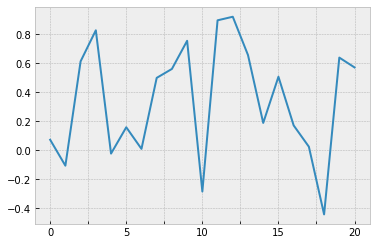

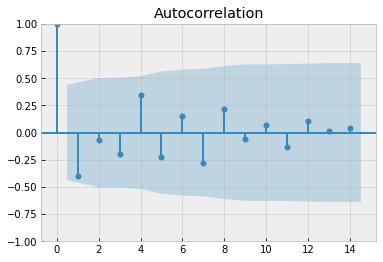

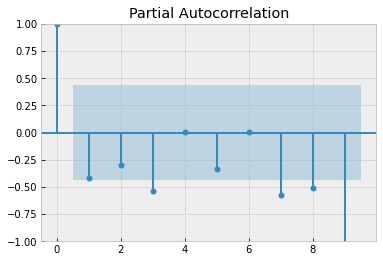

----------------------------------------------------
37768


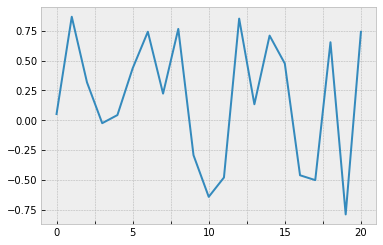

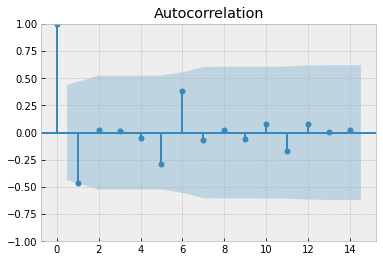

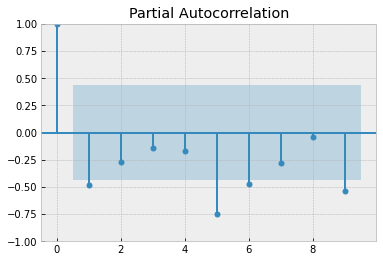

----------------------------------------------------
40102


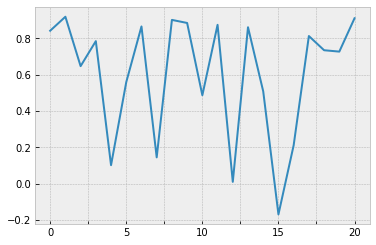

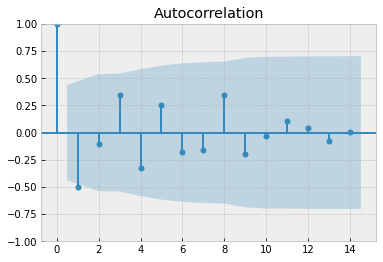

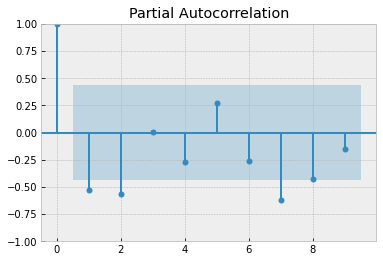

----------------------------------------------------
11209


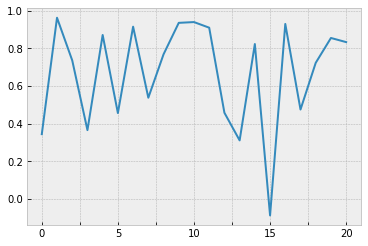

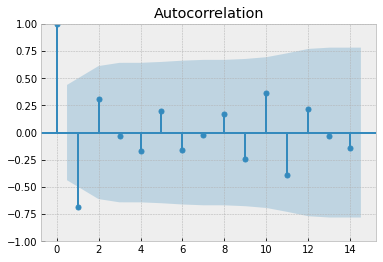

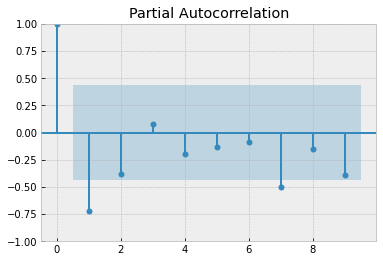

----------------------------------------------------
37236


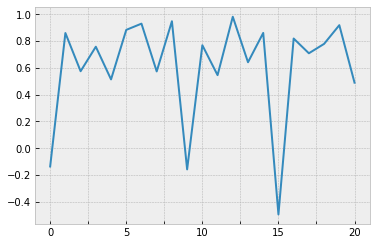

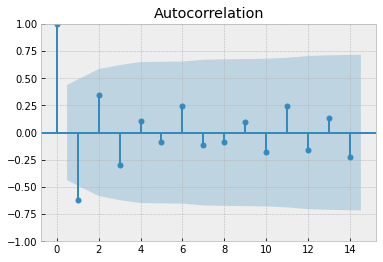

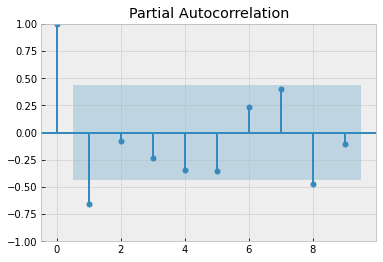

----------------------------------------------------
50930


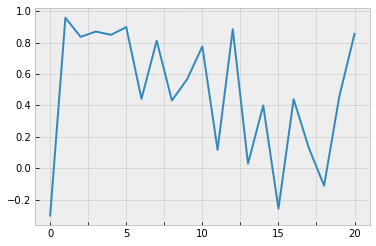

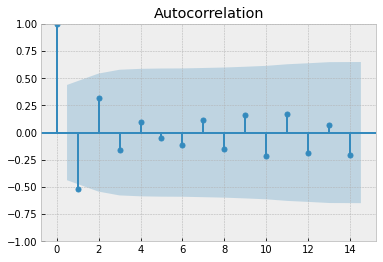

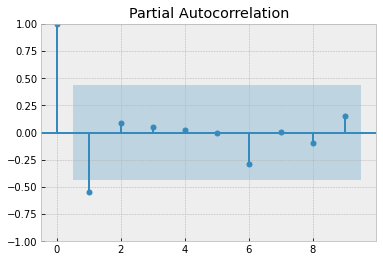

----------------------------------------------------
21072


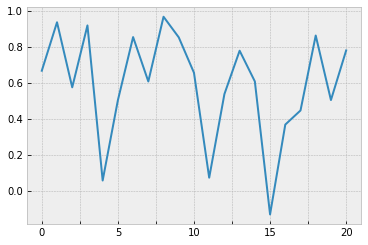

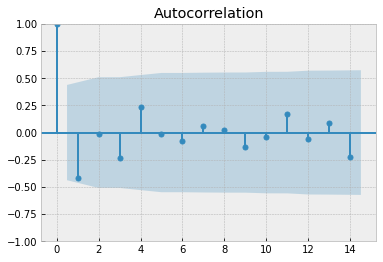

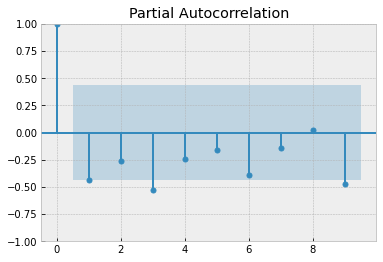

----------------------------------------------------
49067


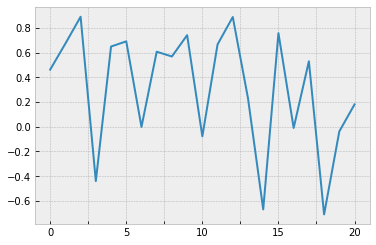

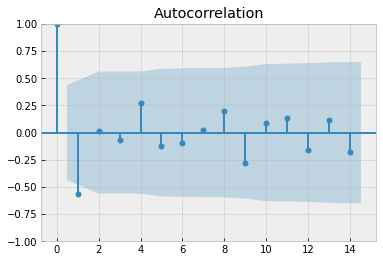

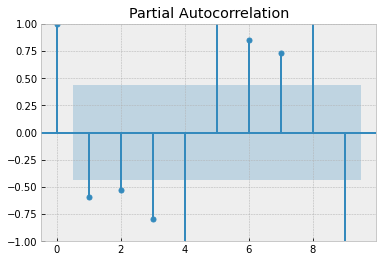

----------------------------------------------------
26636


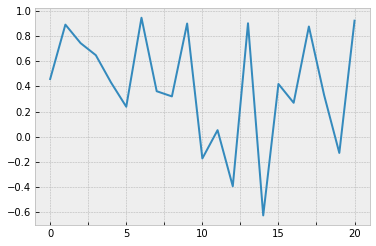

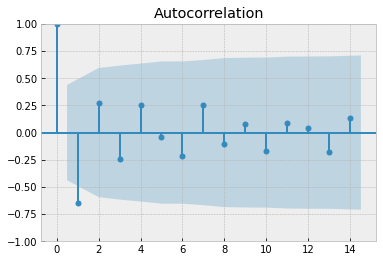

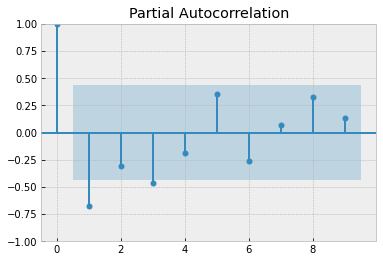

----------------------------------------------------
6761


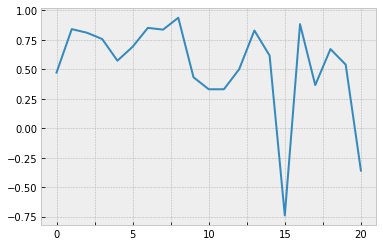

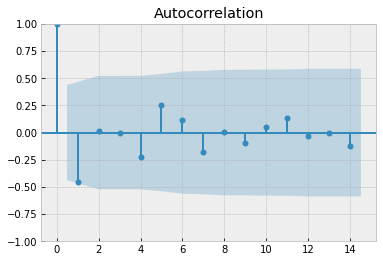

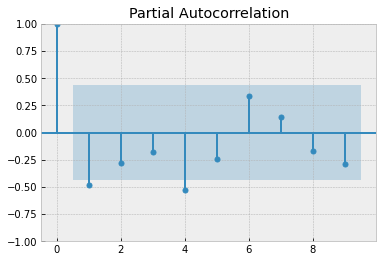

----------------------------------------------------
1359


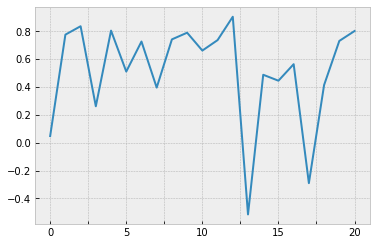

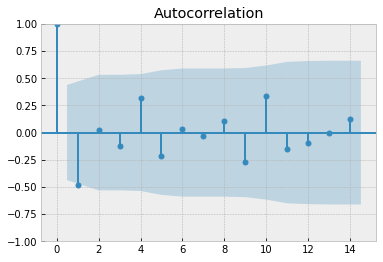

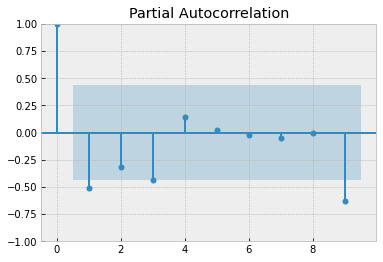

----------------------------------------------------
53530


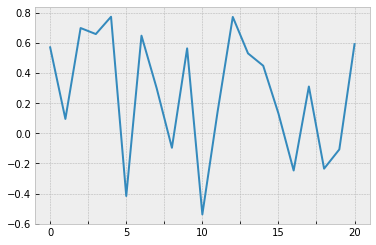

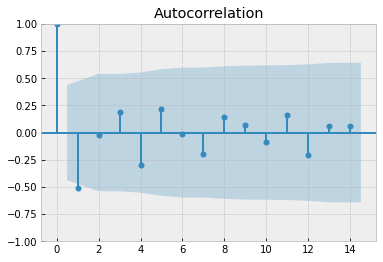

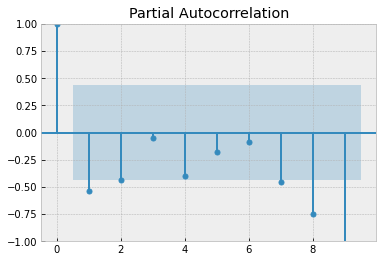

----------------------------------------------------
17093


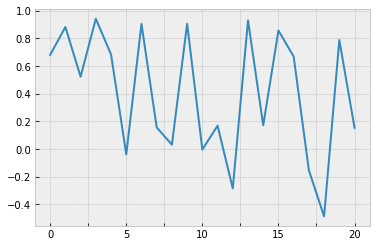

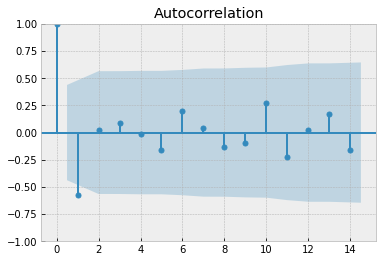

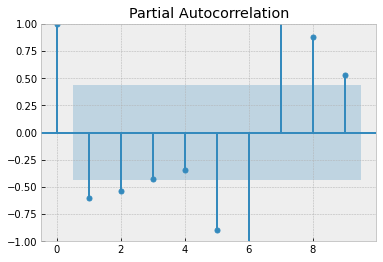

----------------------------------------------------
27844


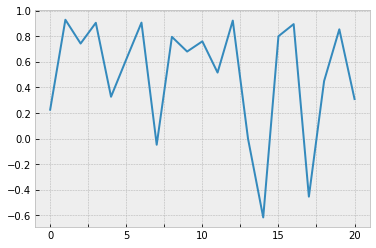

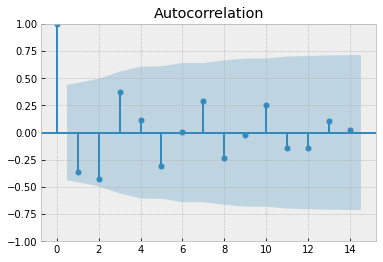

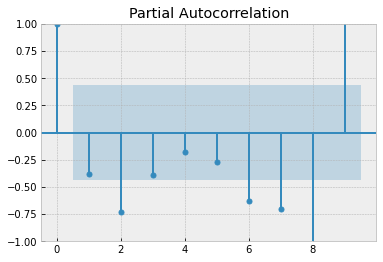

----------------------------------------------------
36


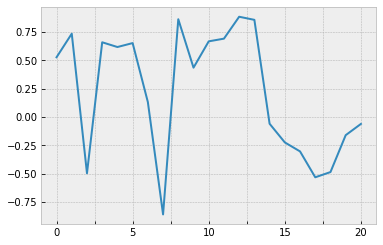

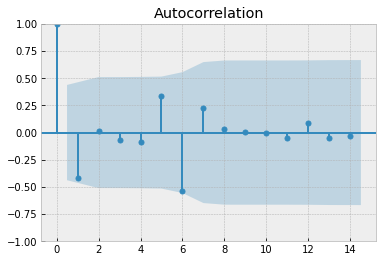

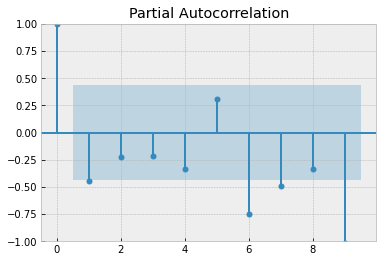

----------------------------------------------------
6550


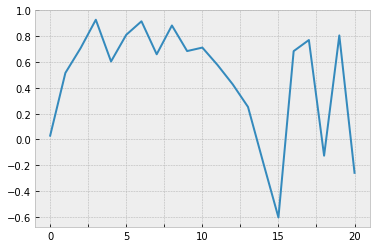

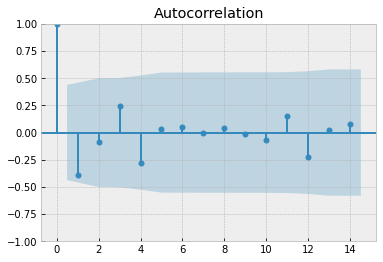

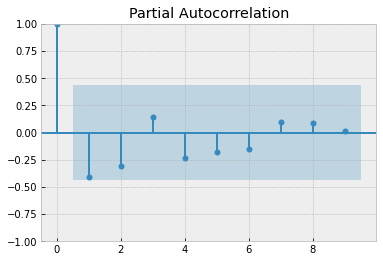

----------------------------------------------------
7246


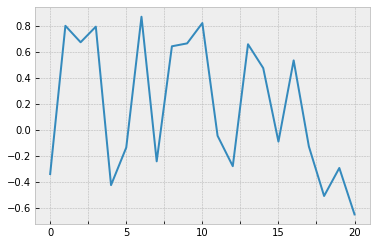

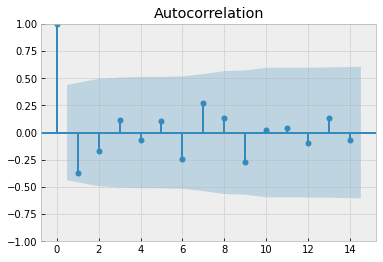

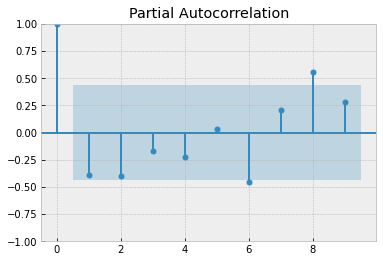

----------------------------------------------------
50828


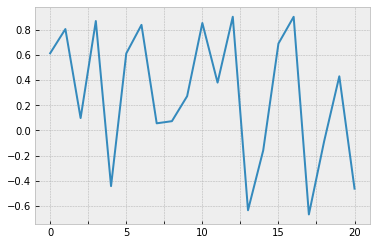

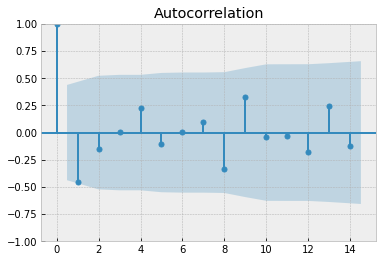

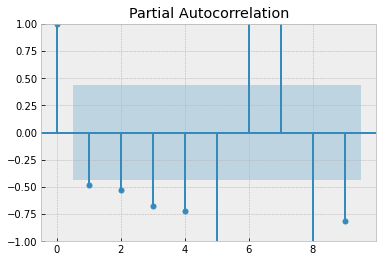

----------------------------------------------------
7930


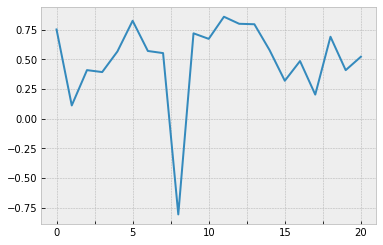

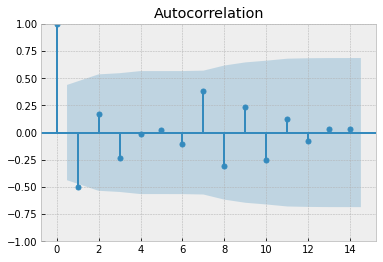

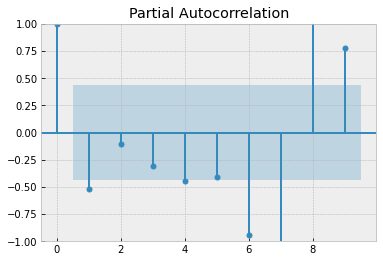

----------------------------------------------------
46961


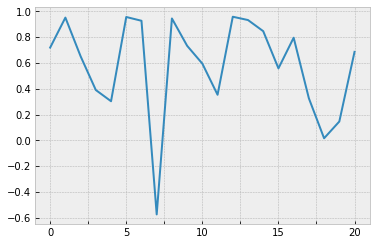

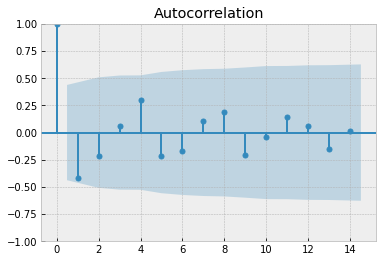

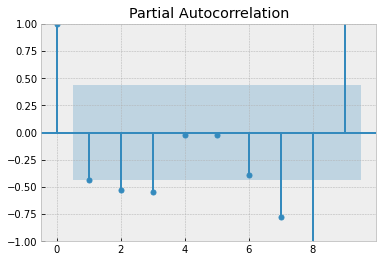

----------------------------------------------------
16465


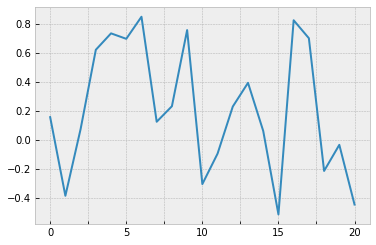

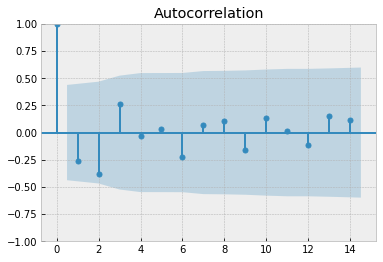

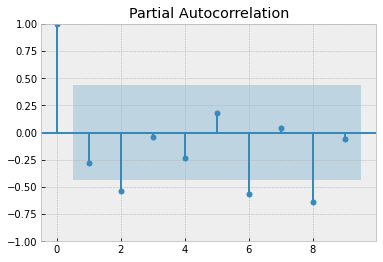

----------------------------------------------------
38027


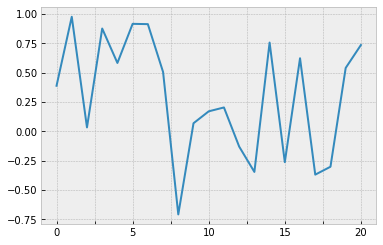

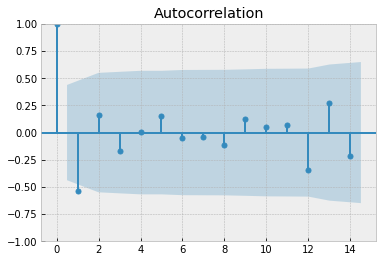

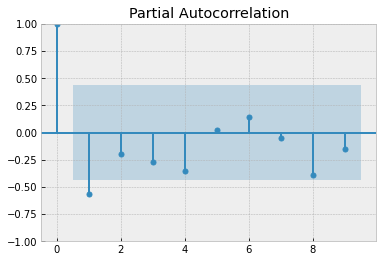

----------------------------------------------------
54023


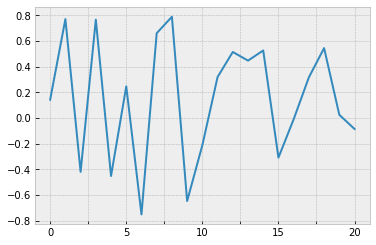

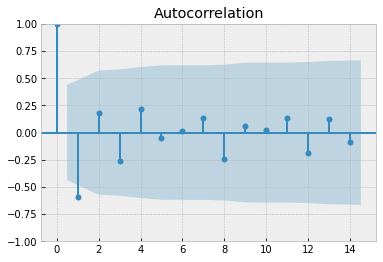

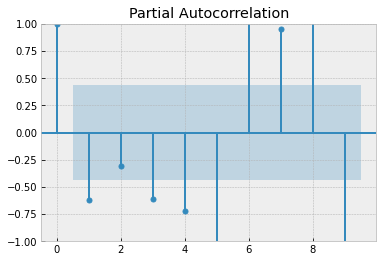

----------------------------------------------------
8912


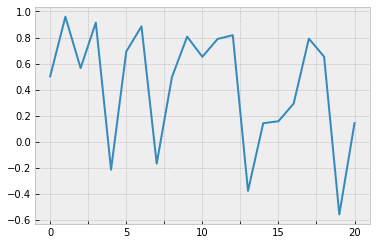

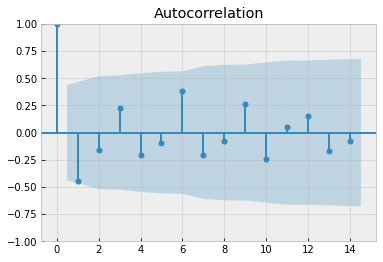

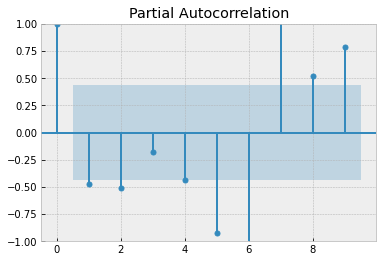

----------------------------------------------------
2921


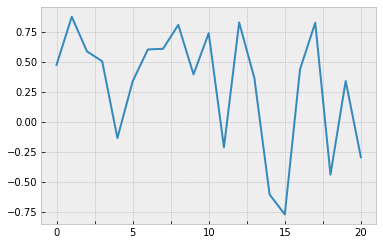

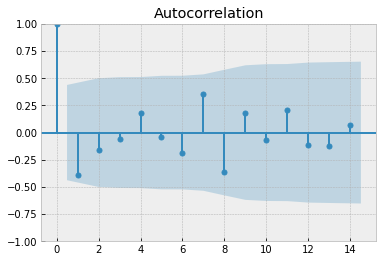

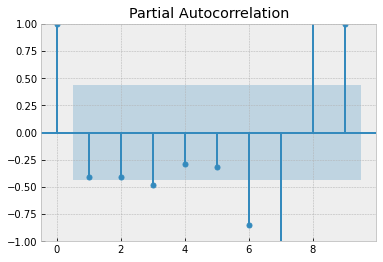

----------------------------------------------------
27284


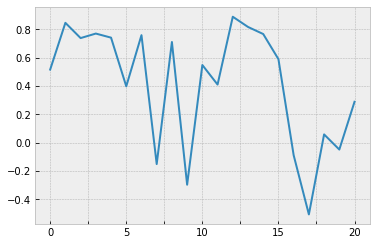

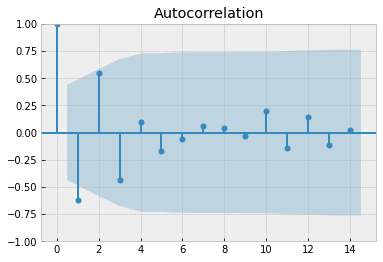

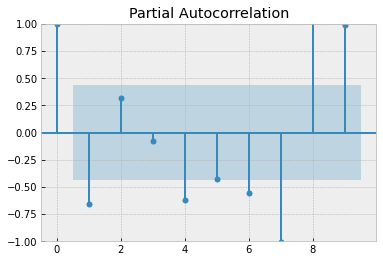

----------------------------------------------------
27555


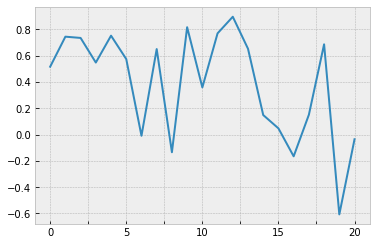

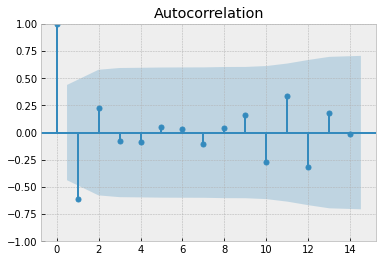

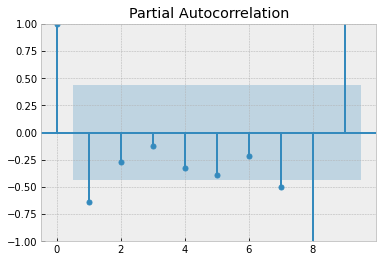

----------------------------------------------------
20451


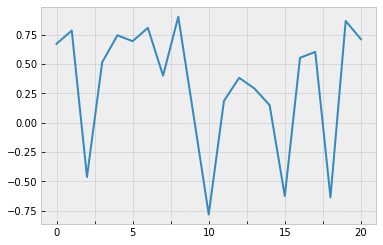

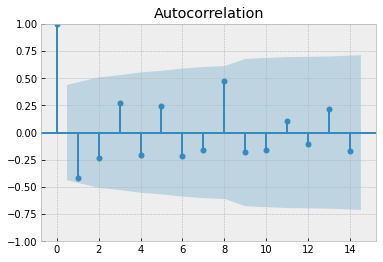

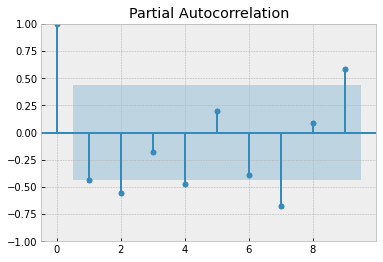

----------------------------------------------------
53232


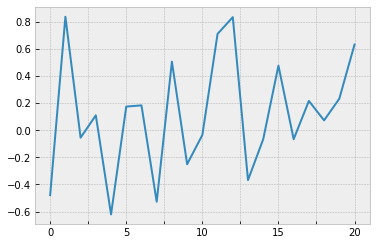

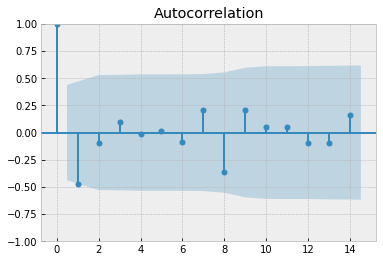

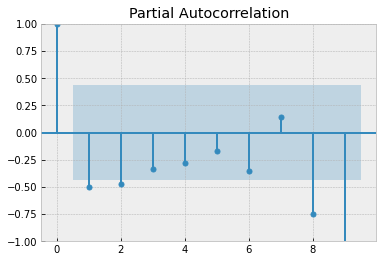

----------------------------------------------------
18157


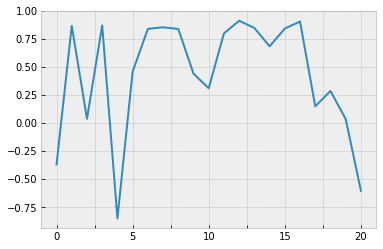

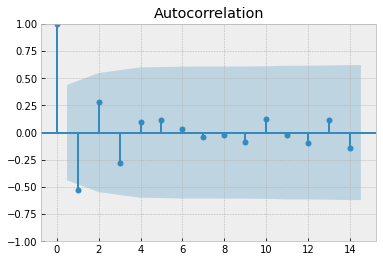

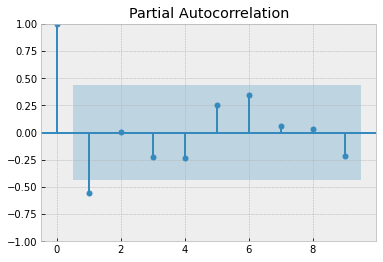

----------------------------------------------------
41540


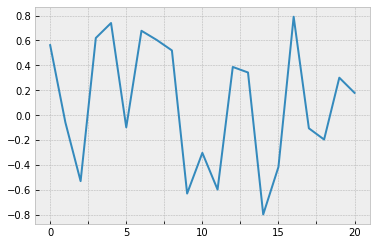

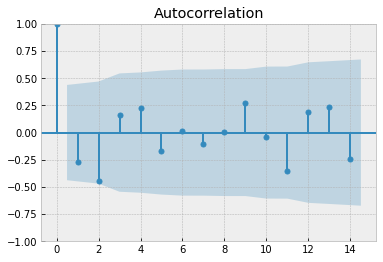

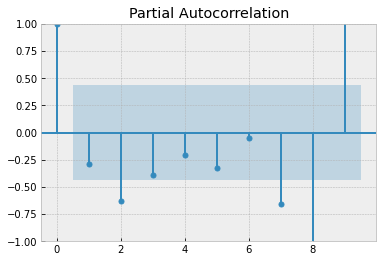

----------------------------------------------------
44151


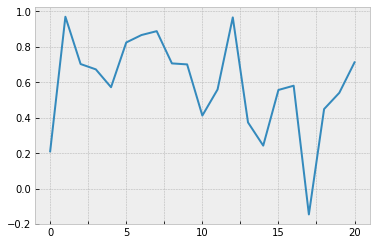

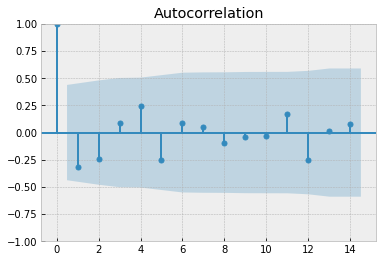

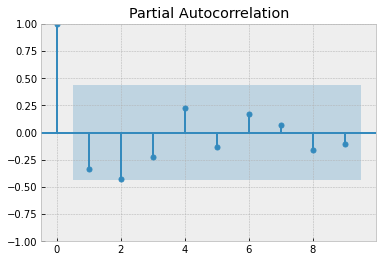

----------------------------------------------------
29487


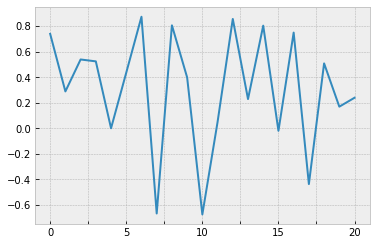

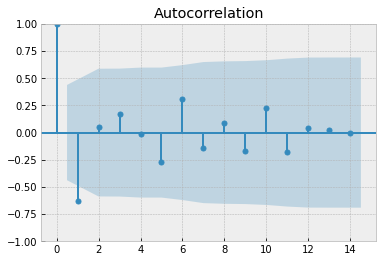

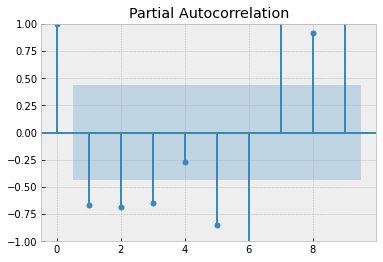

----------------------------------------------------
15944


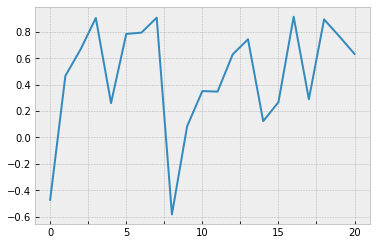

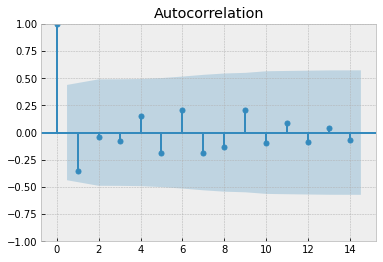

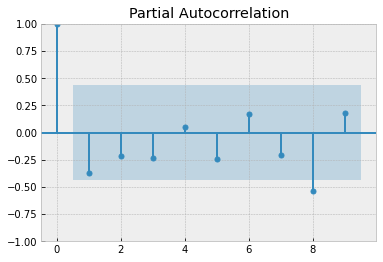

----------------------------------------------------
23738


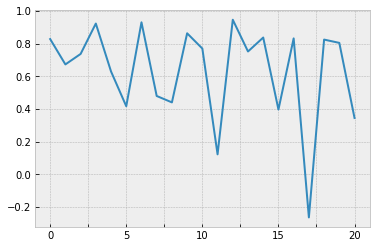

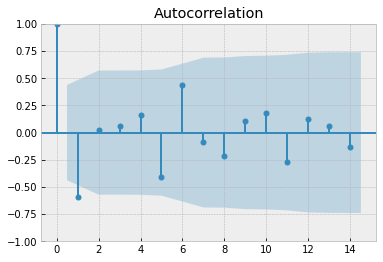

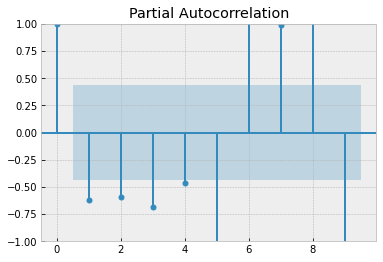

----------------------------------------------------
20712


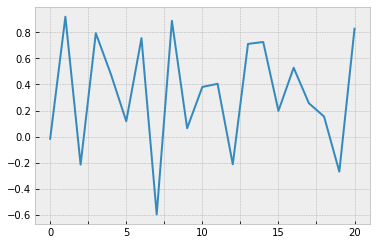

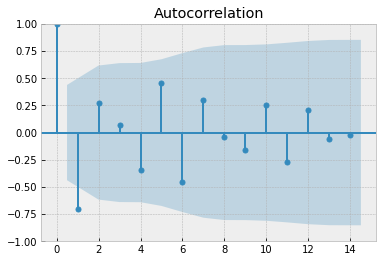

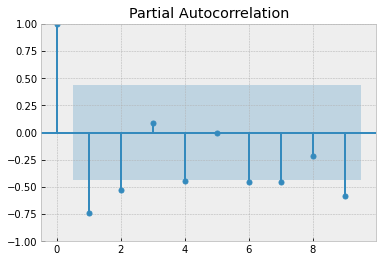

----------------------------------------------------
26737


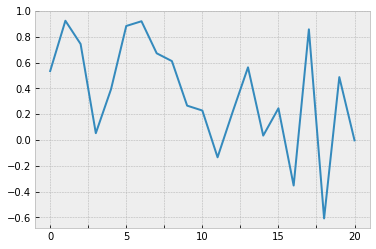

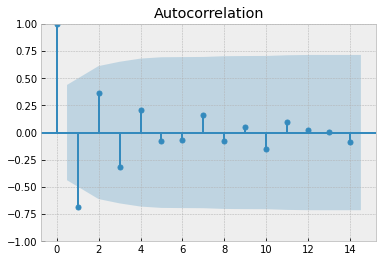

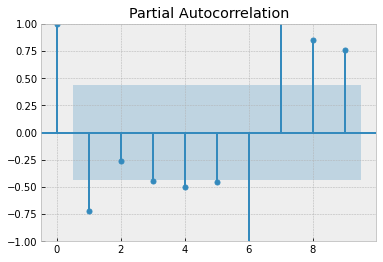

----------------------------------------------------
19450


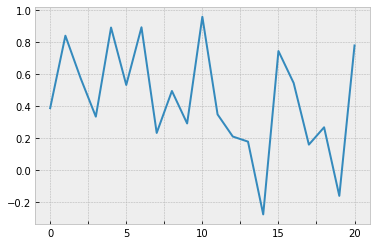

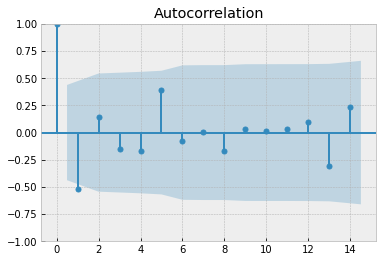

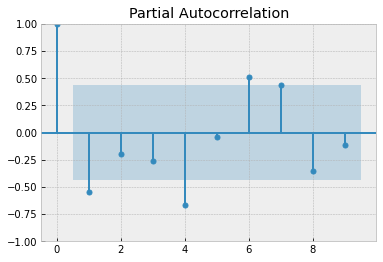

----------------------------------------------------
20990


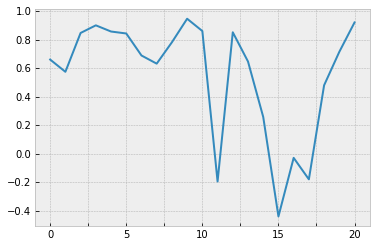

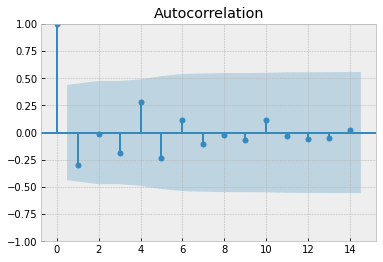

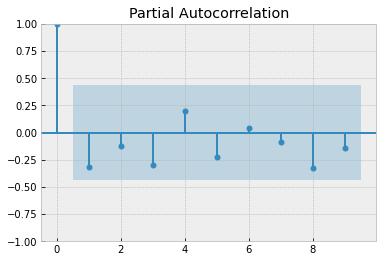

----------------------------------------------------
17711


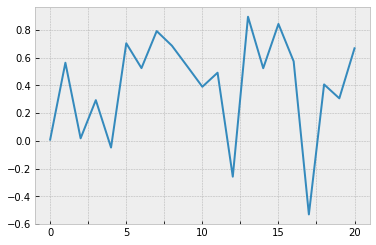

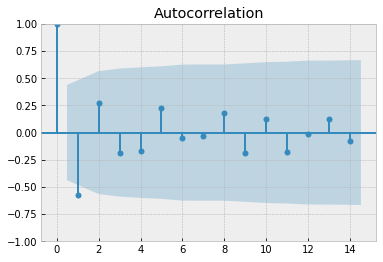

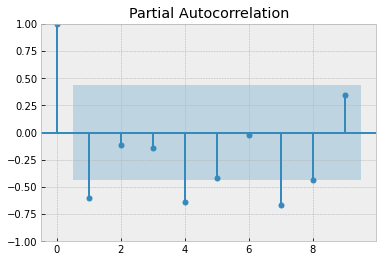

----------------------------------------------------
50177


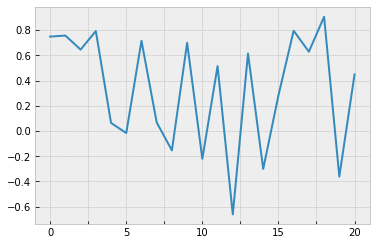

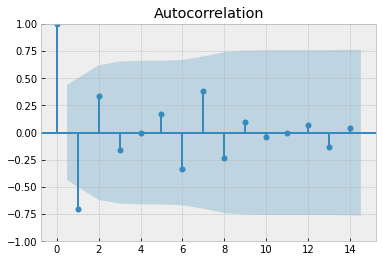

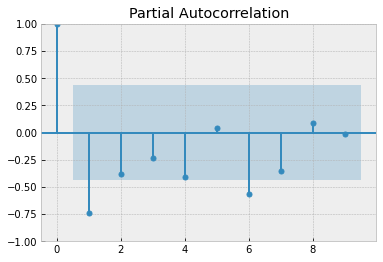

----------------------------------------------------
1851


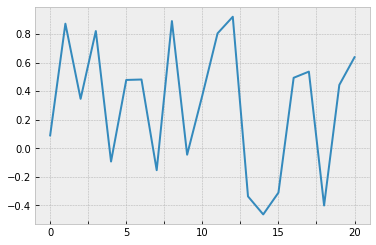

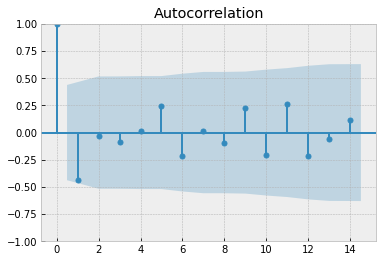

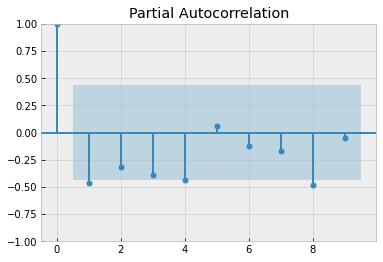

----------------------------------------------------
11829


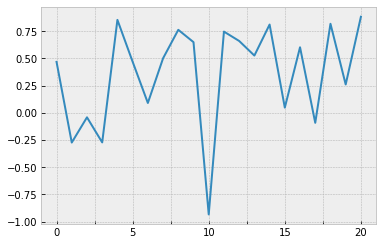

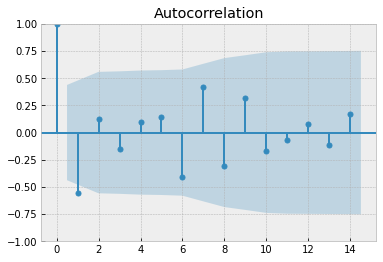

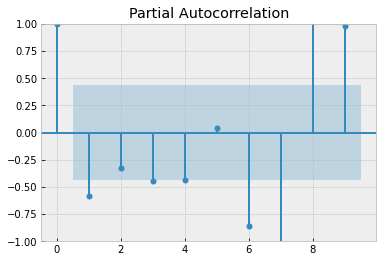

----------------------------------------------------
45105


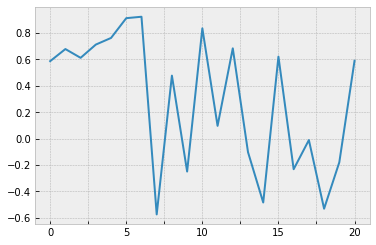

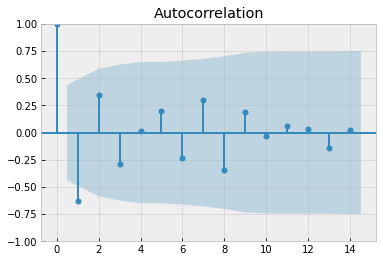

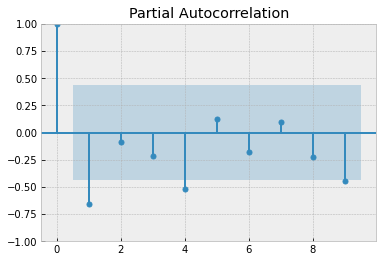

----------------------------------------------------
36226


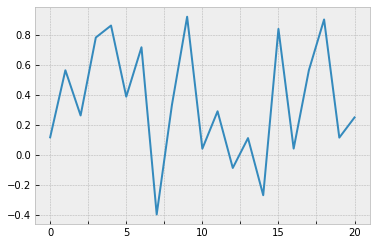

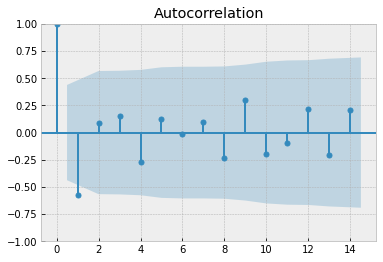

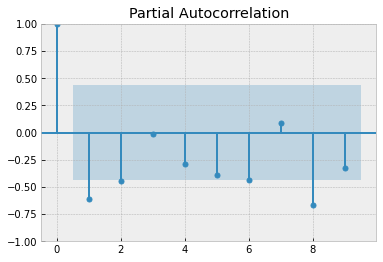

----------------------------------------------------
51081


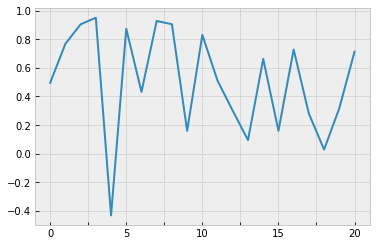

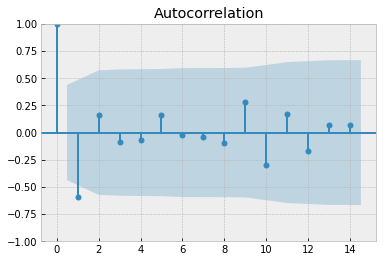

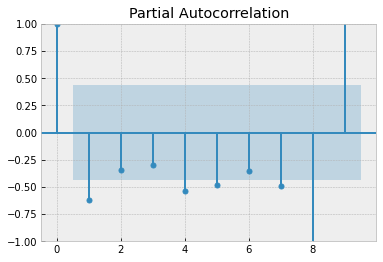

----------------------------------------------------
44215


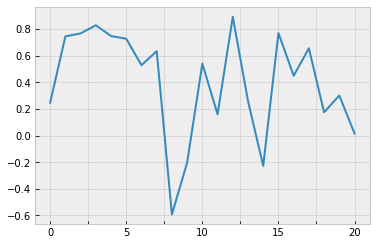

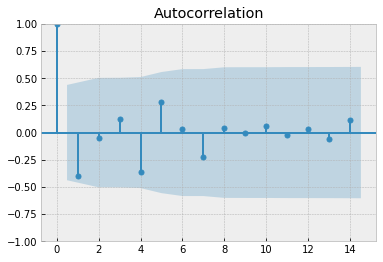

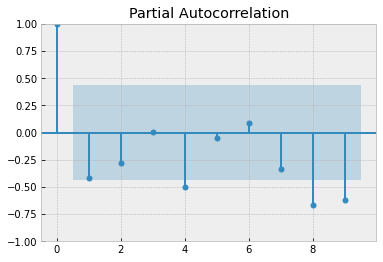

----------------------------------------------------
43132


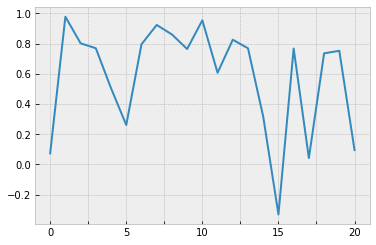

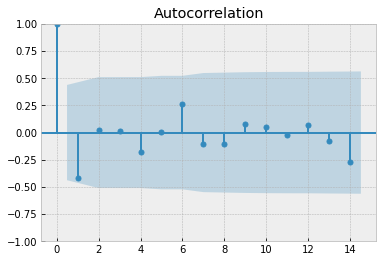

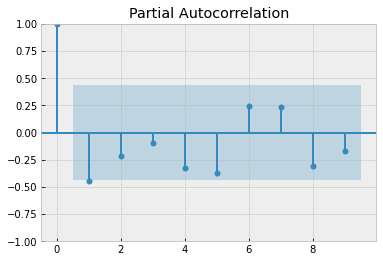

----------------------------------------------------
37028


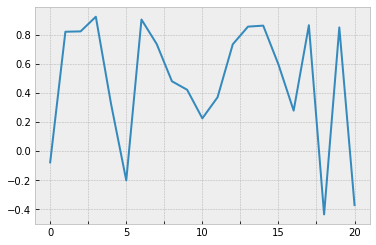

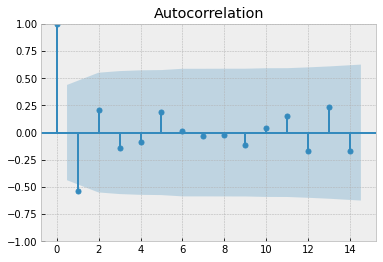

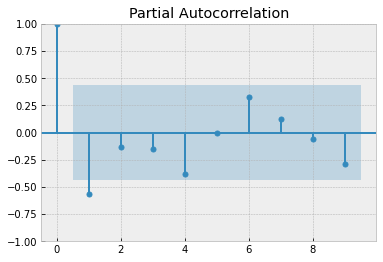

----------------------------------------------------
44323


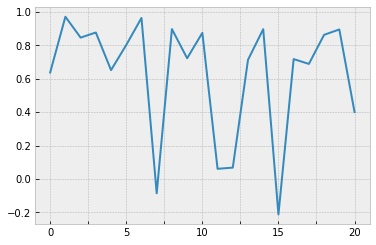

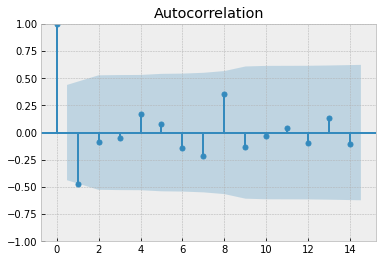

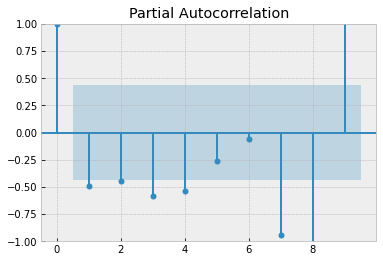

----------------------------------------------------
51952


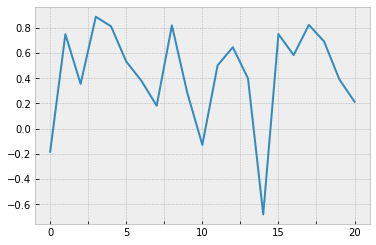

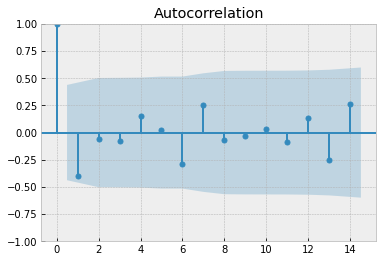

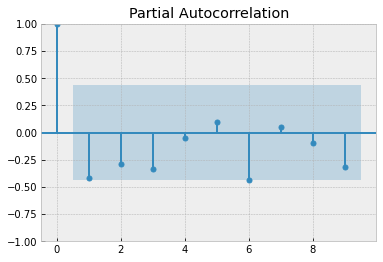

----------------------------------------------------
34667


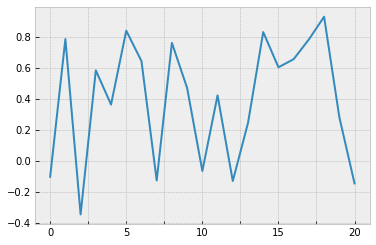

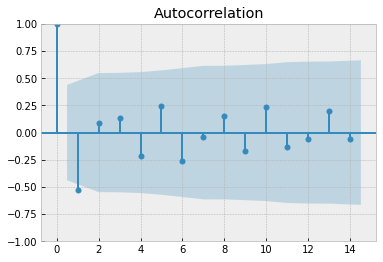

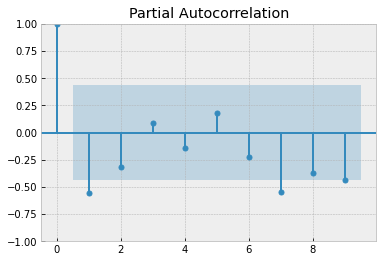

----------------------------------------------------
8787


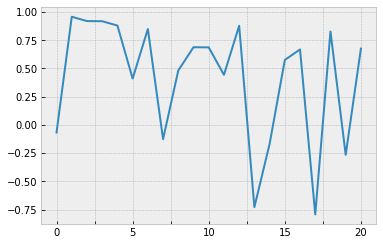

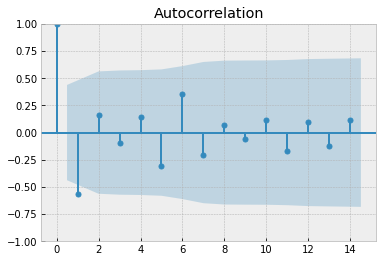

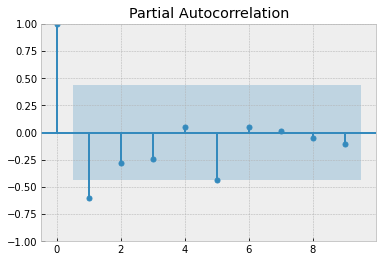

----------------------------------------------------
22832


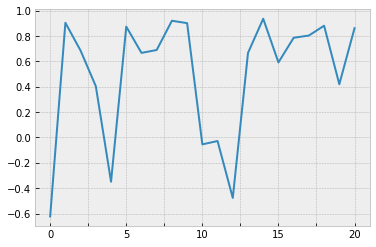

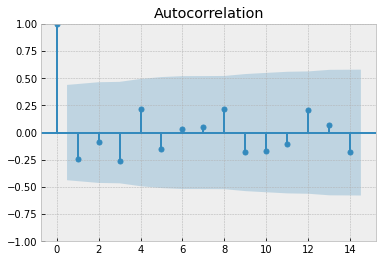

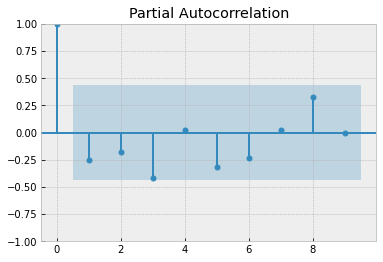

----------------------------------------------------
28471


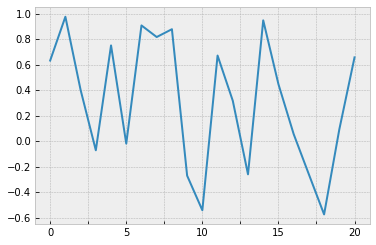

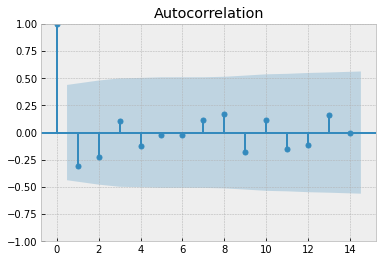

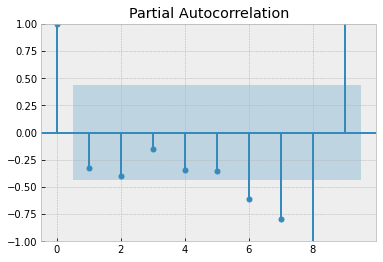

----------------------------------------------------
45034


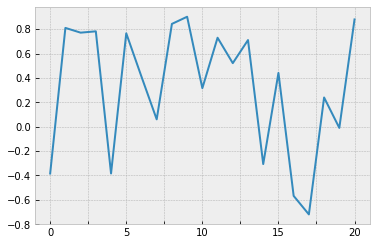

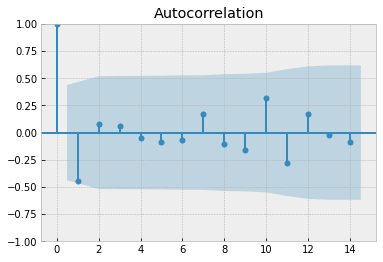

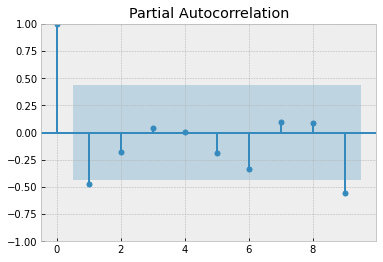

----------------------------------------------------
48384


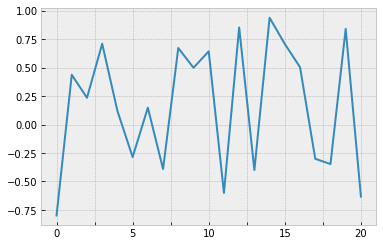

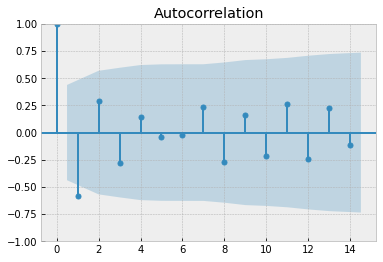

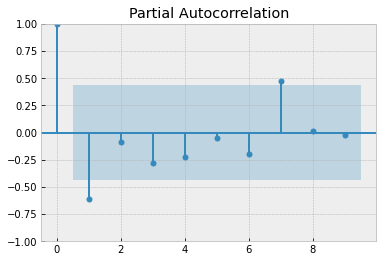

----------------------------------------------------
39987


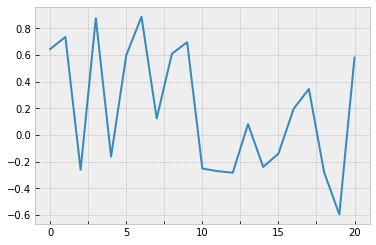

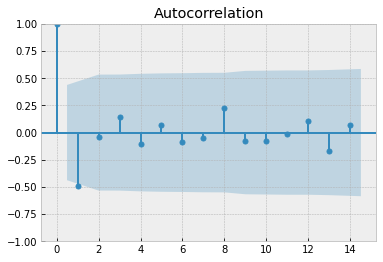

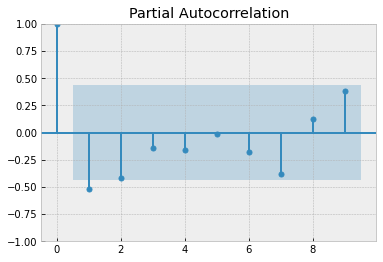

----------------------------------------------------
26654


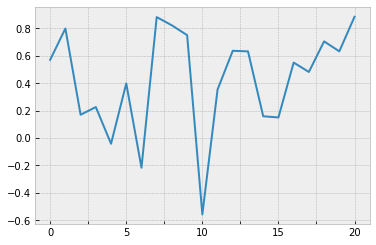

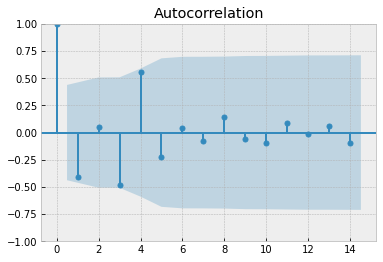

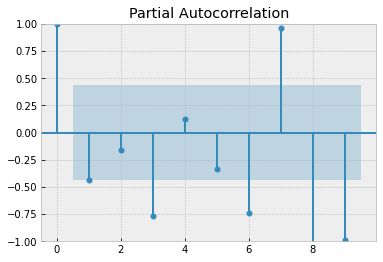

----------------------------------------------------
8608


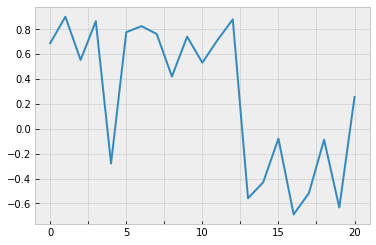

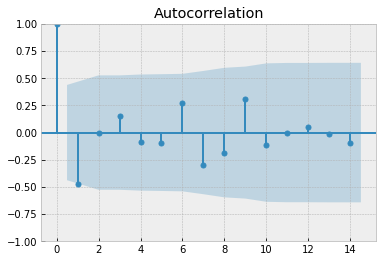

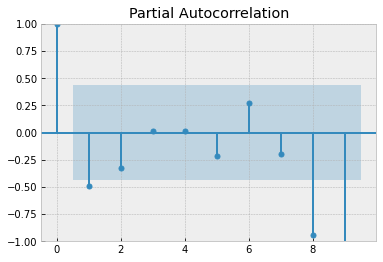

----------------------------------------------------
36888


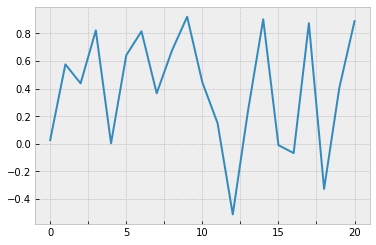

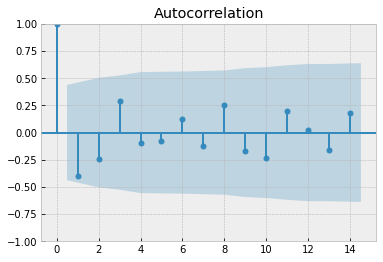

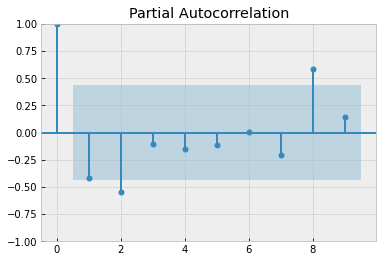

----------------------------------------------------
24176


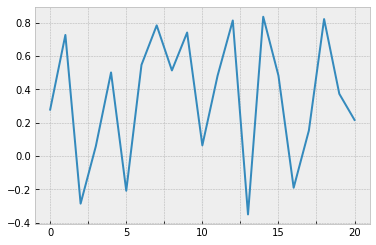

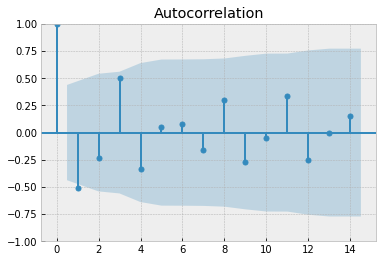

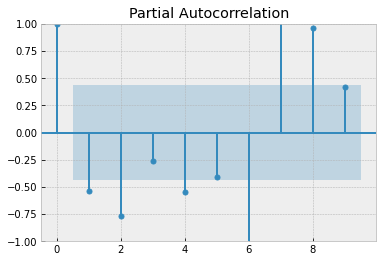

----------------------------------------------------
43322


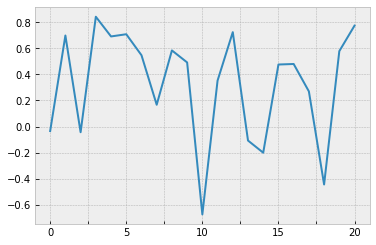

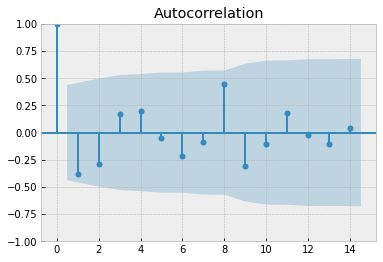

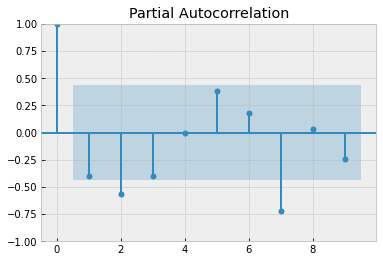

----------------------------------------------------
19912


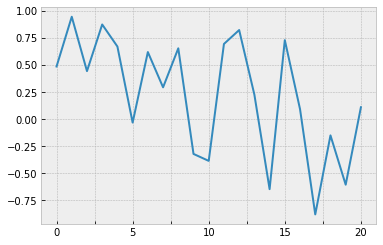

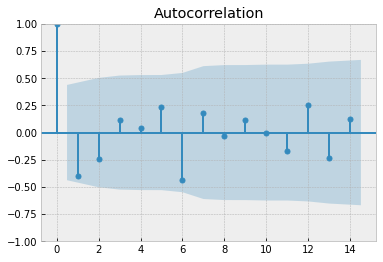

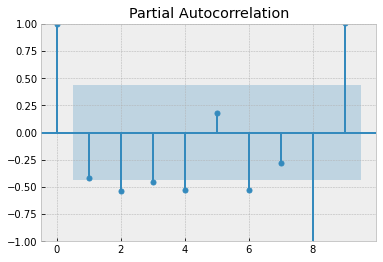

----------------------------------------------------
9655


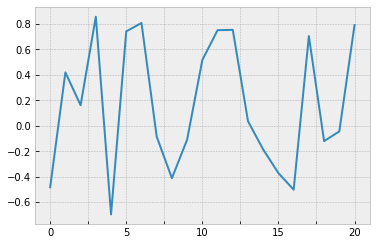

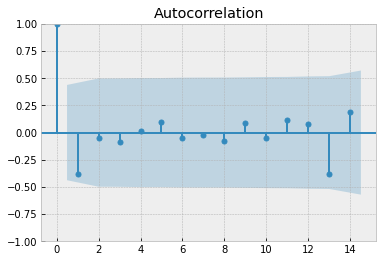

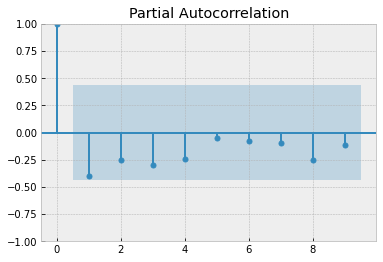

----------------------------------------------------
25828


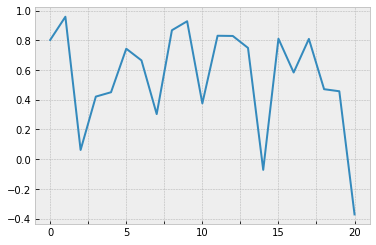

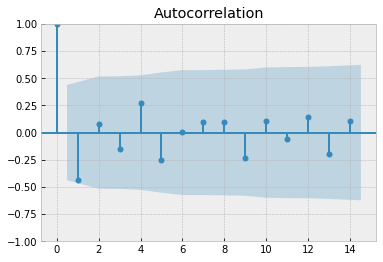

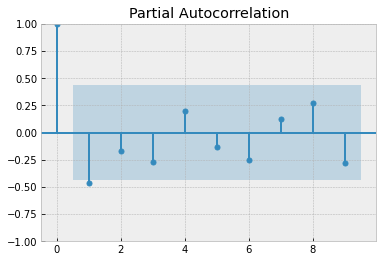

----------------------------------------------------
13815


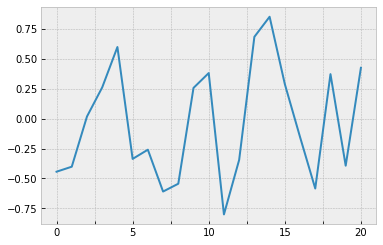

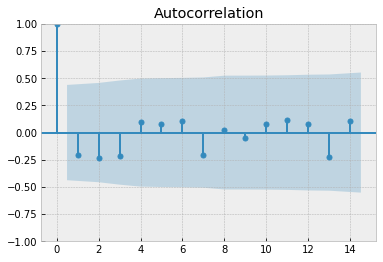

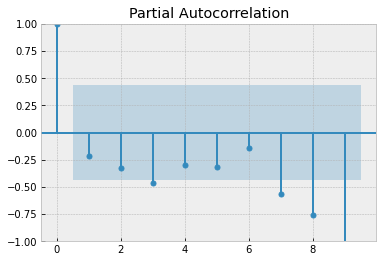

----------------------------------------------------
19313


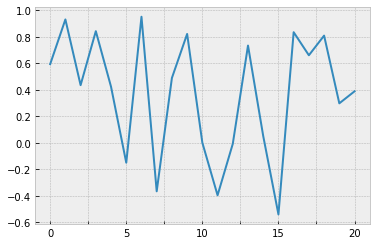

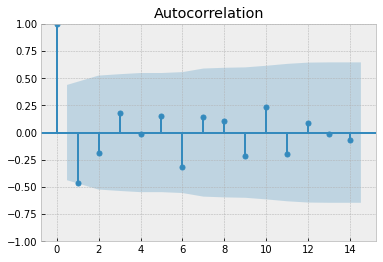

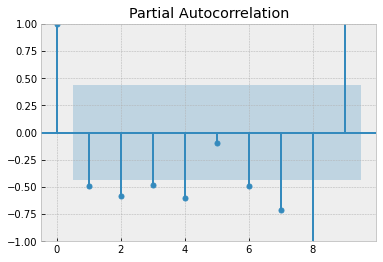

----------------------------------------------------
49563


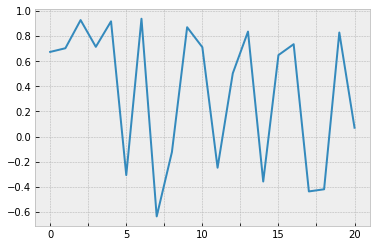

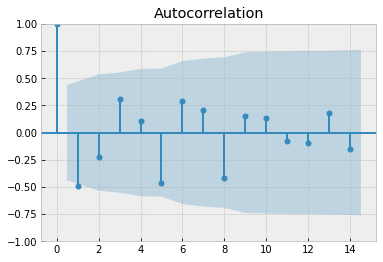

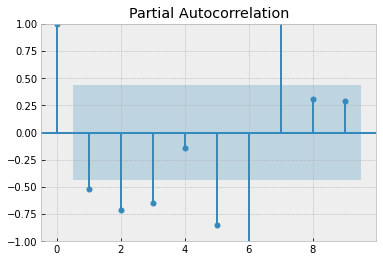

----------------------------------------------------
47820


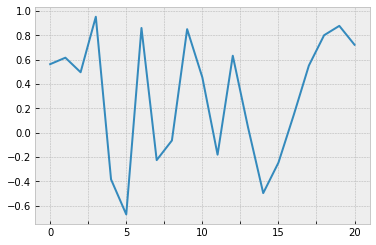

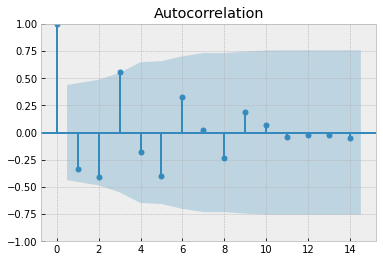

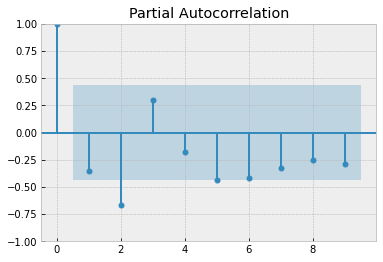

----------------------------------------------------
8265


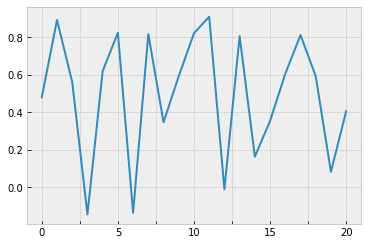

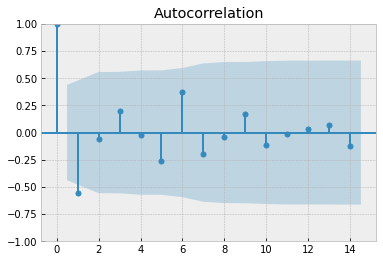

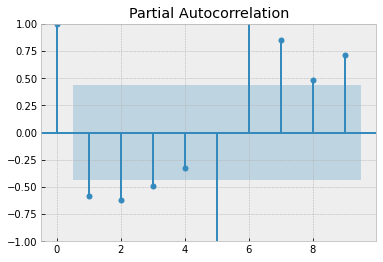

----------------------------------------------------
12234


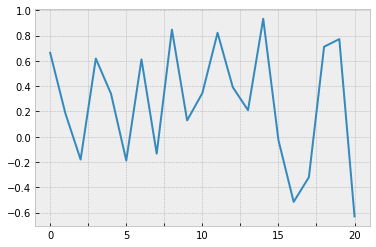

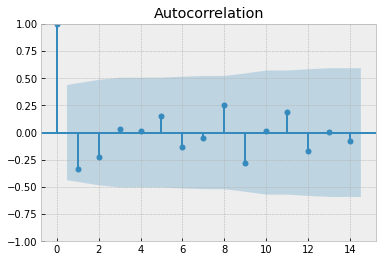

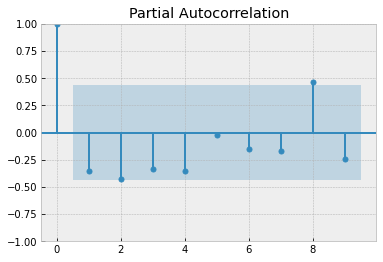

----------------------------------------------------
55407


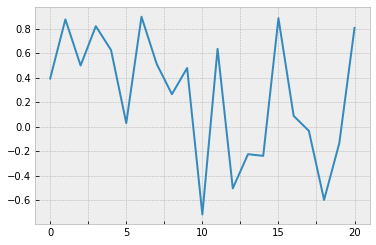

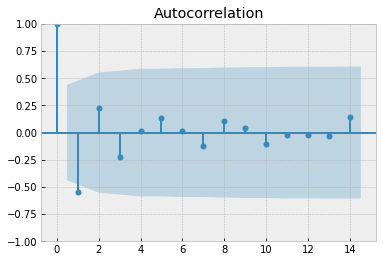

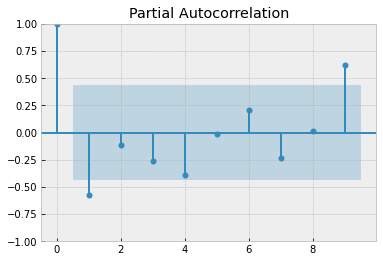

----------------------------------------------------
54065


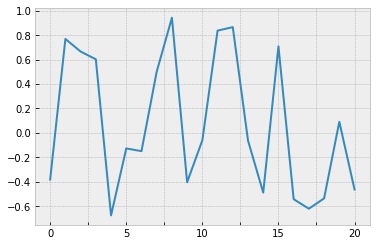

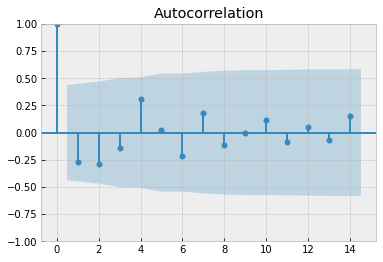

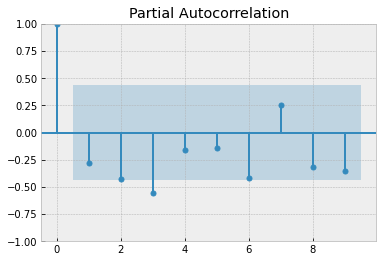

----------------------------------------------------
55027


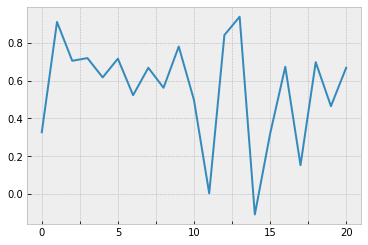

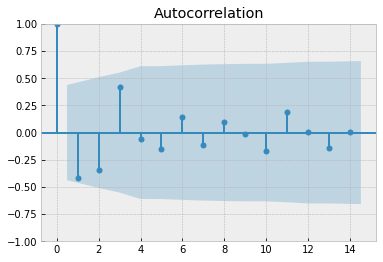

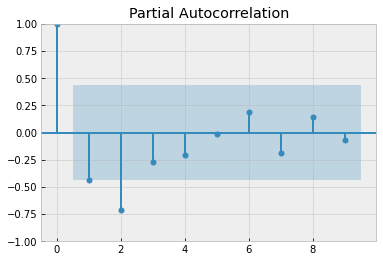

----------------------------------------------------
2695


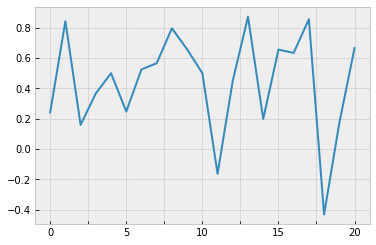

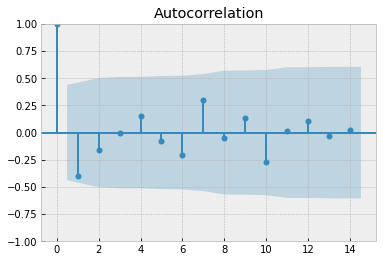

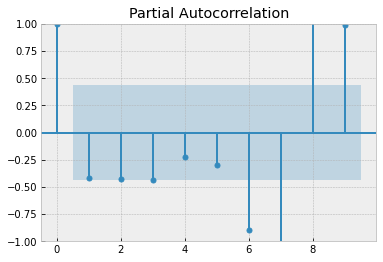

----------------------------------------------------
55373


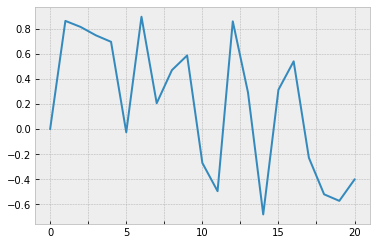

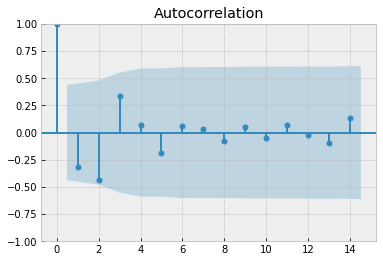

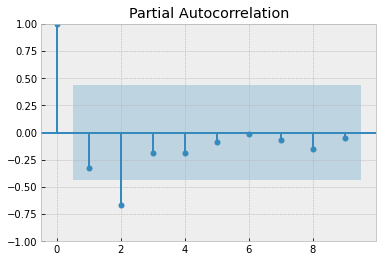

----------------------------------------------------
43462


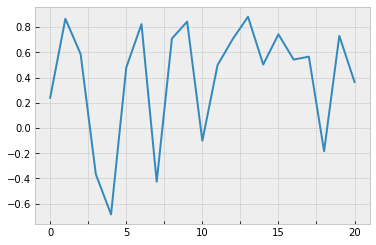

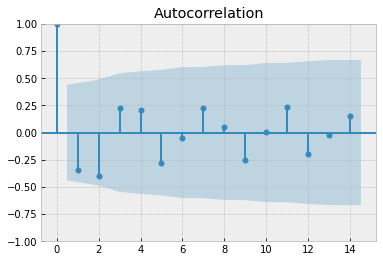

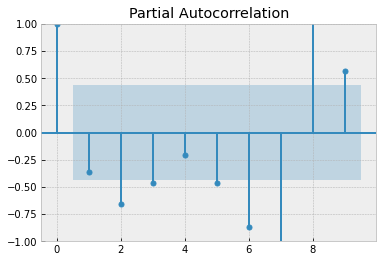

----------------------------------------------------
1464


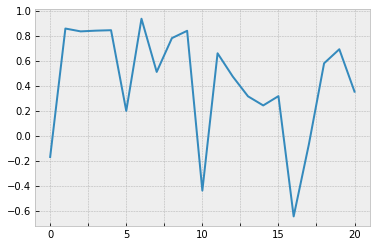

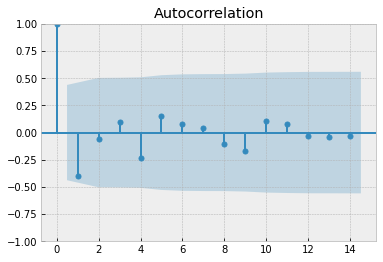

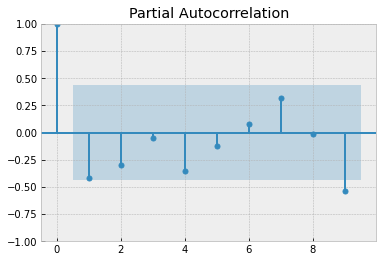

----------------------------------------------------
47941


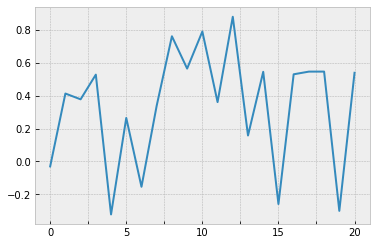

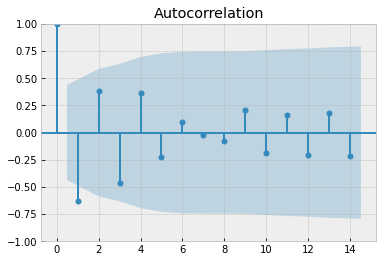

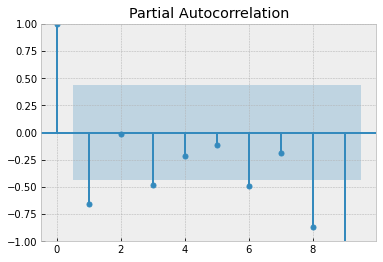

----------------------------------------------------
38748


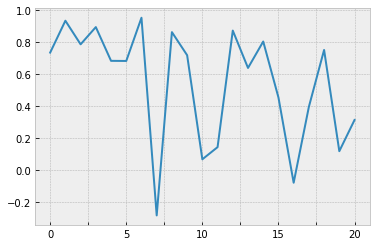

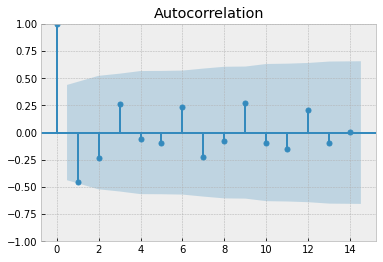

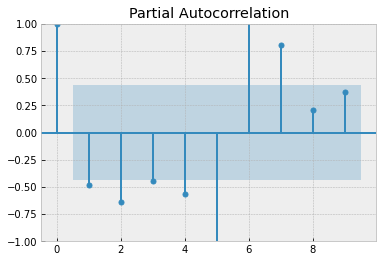

----------------------------------------------------
54150


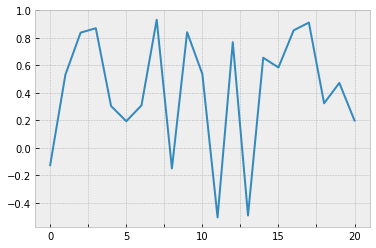

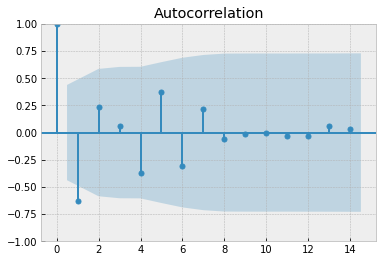

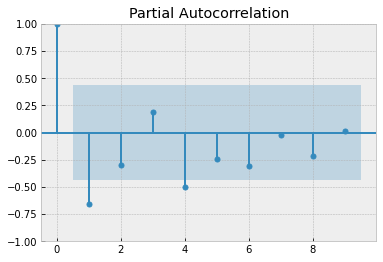

----------------------------------------------------
13127


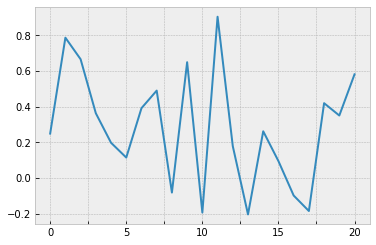

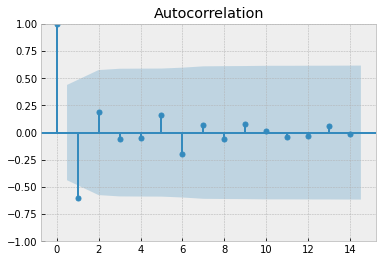

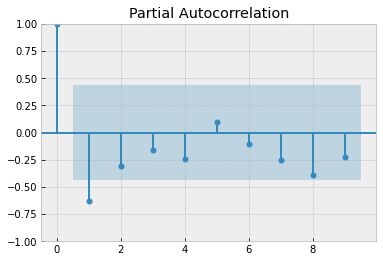

----------------------------------------------------
45216


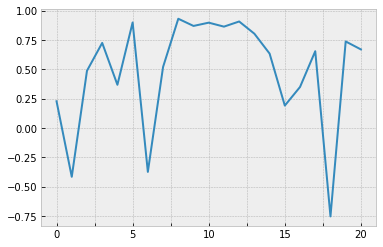

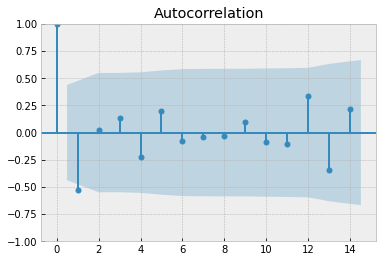

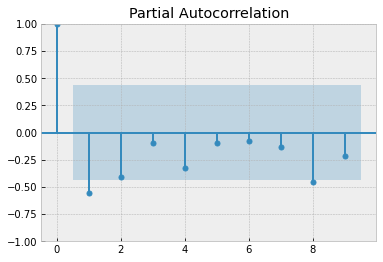

----------------------------------------------------
8409


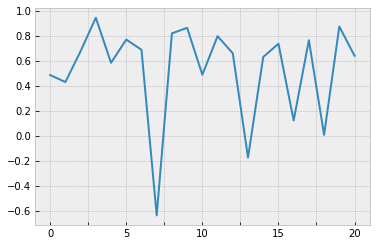

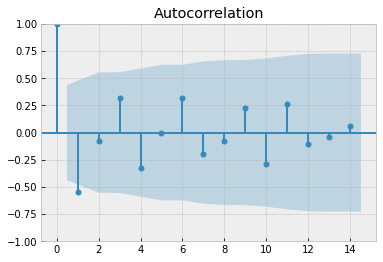

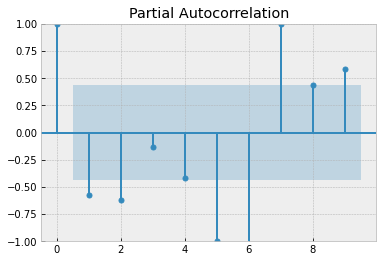

----------------------------------------------------
37759


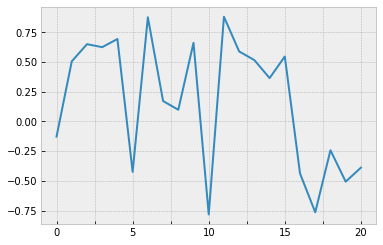

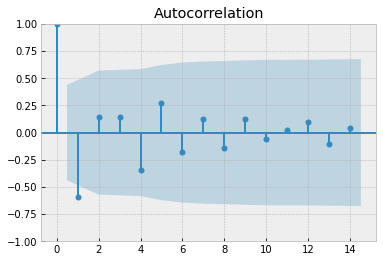

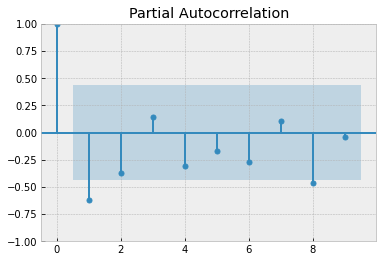

----------------------------------------------------
35500


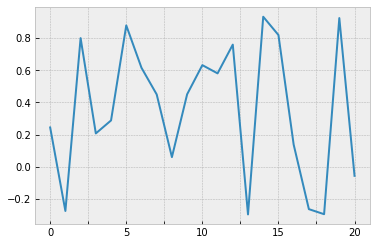

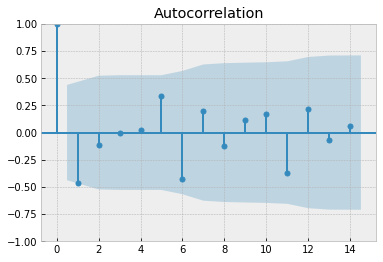

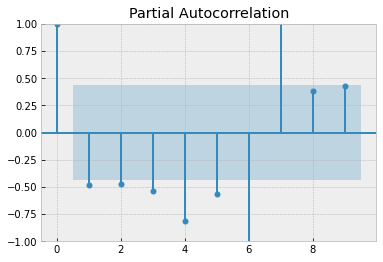

----------------------------------------------------
20962


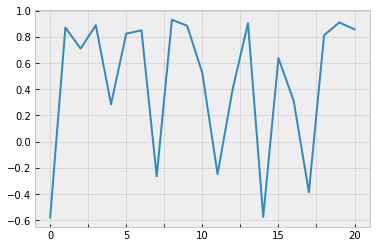

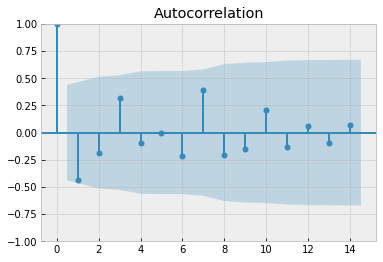

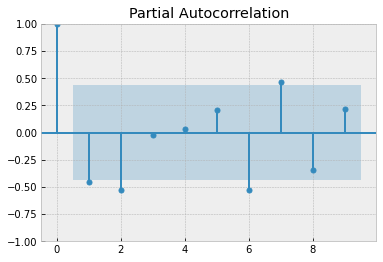

----------------------------------------------------
45492


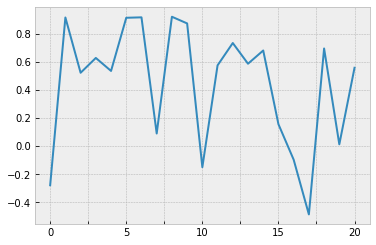

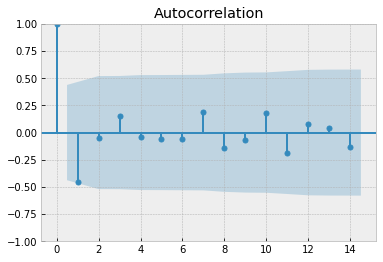

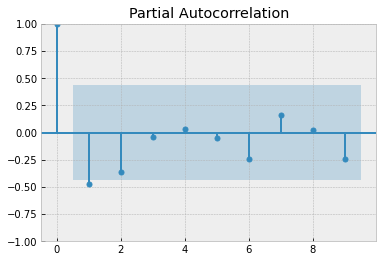

----------------------------------------------------
54744


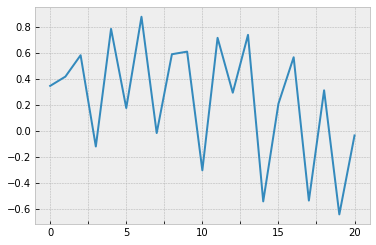

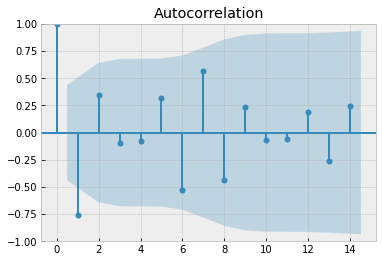

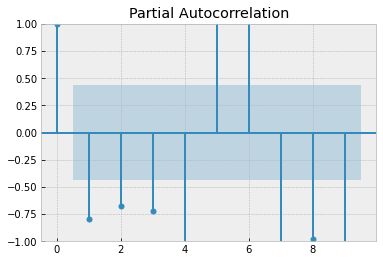

----------------------------------------------------
17996


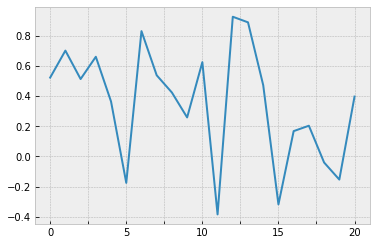

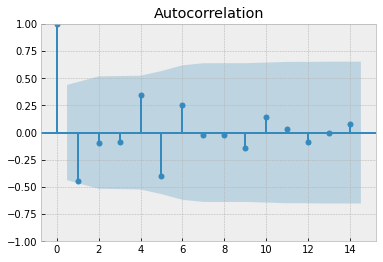

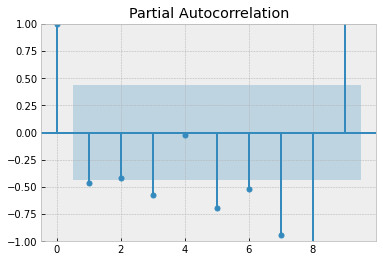

----------------------------------------------------
55732


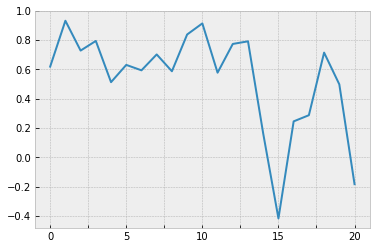

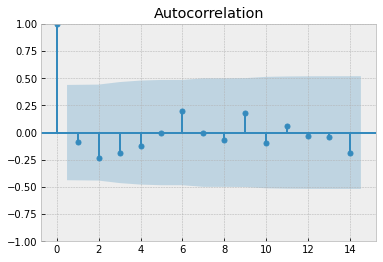

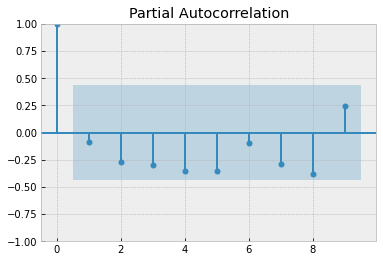

----------------------------------------------------
55279


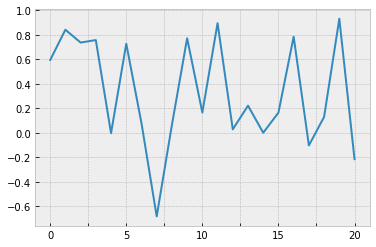

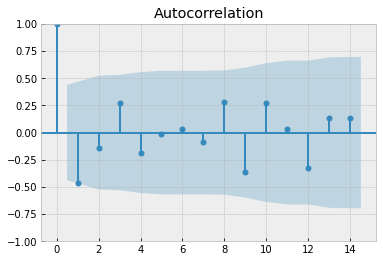

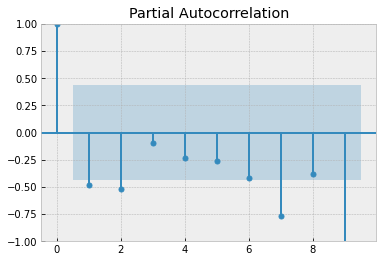

----------------------------------------------------
28139


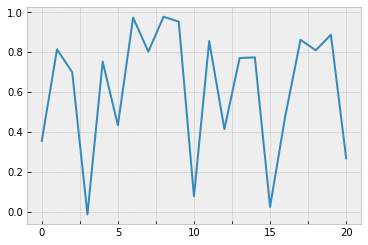

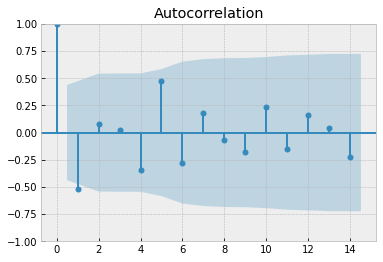

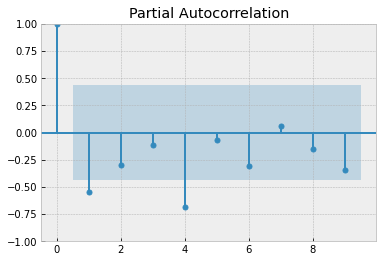

----------------------------------------------------
3922


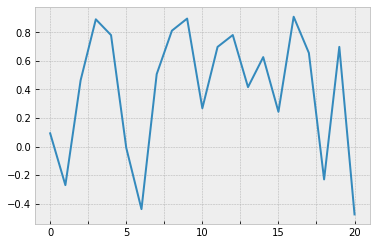

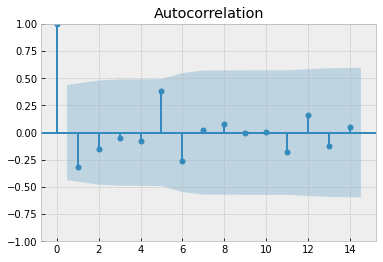

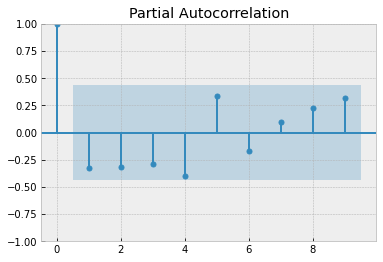

----------------------------------------------------
27829


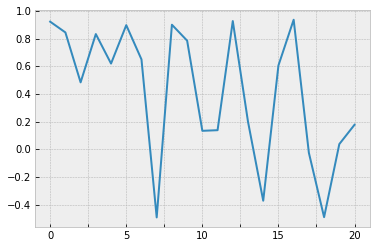

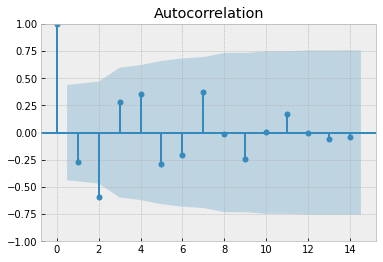

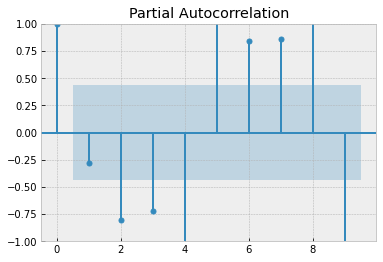

----------------------------------------------------
29154


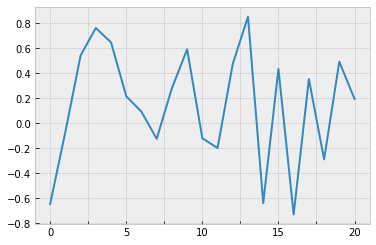

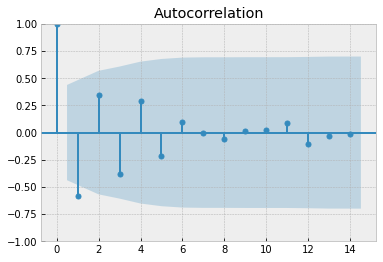

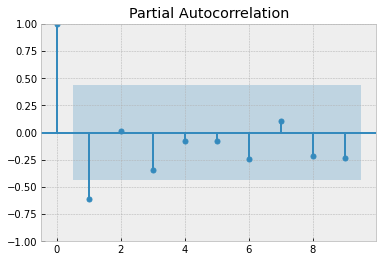

----------------------------------------------------
52434


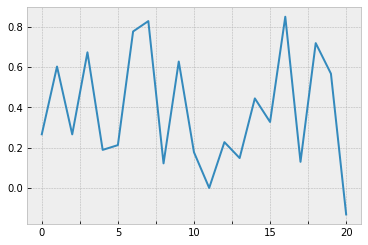

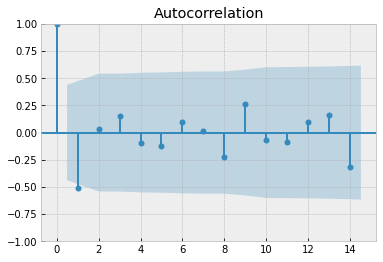

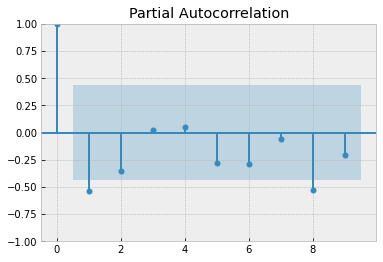

----------------------------------------------------
53156


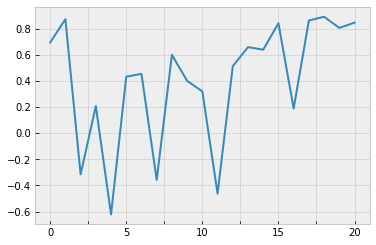

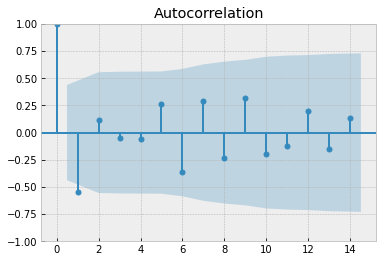

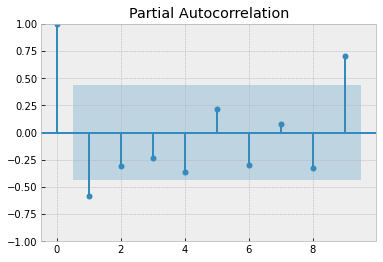

----------------------------------------------------
25015


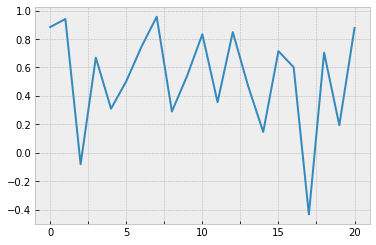

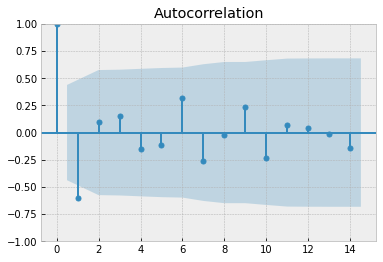

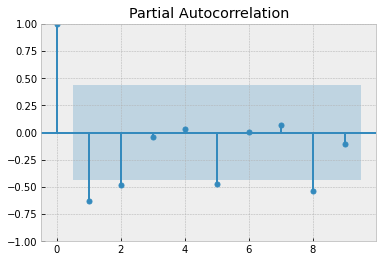

----------------------------------------------------
time: 21.7 s (started: 2022-04-27 05:02:12 +00:00)


In [7]:
train = pd.read_csv('./stock_correlation_prediction/train_dev_test/before_arima/train.csv')
train = np.transpose(train.loc[:, ~train.columns.str.contains('^Unnamed')])
for _ in range(100):
    randint = random.randrange(0,55875,1)
    print(randint)
    train[randint].plot()
    plt.show()
    plt.close()
    plot_acf(train[randint].diff()[1:])
    plt.show()
    plt.close()
    plot_pacf(train[randint].diff()[1:], lags=9)
    plt.show()
    plt.close()
    print('----------------------------------------------------')

In [8]:
stat = pd.DataFrame()
for i in range(55875):
    df = train[i].describe()
    stat[i] = df
stat

0          1          2          3          4          5      \
count  21.000000  21.000000  21.000000  21.000000  21.000000  21.000000   
mean    0.467162   0.456730   0.486936   0.508950   0.453143   0.334481   
std     0.324179   0.394954   0.395142   0.430719   0.426572   0.416970   
min    -0.263715  -0.427287  -0.516127  -0.536545  -0.667206  -0.799536   
25%     0.188668   0.239057   0.265099   0.320646   0.318157   0.112211   
50%     0.555098   0.594037   0.698361   0.676093   0.558642   0.429319   
75%     0.673331   0.758942   0.805386   0.834689   0.721777   0.591869   
max     0.917480   0.893918   0.902180   0.910266   0.917614   0.954869   

           6          7          8          9      ...      55865      55866  \
count  21.000000  21.000000  21.000000  21.000000  ...  21.000000  21.000000   
mean    0.346837   0.362295   0.412165   0.370844  ...   0.506204   0.491705   
std     0.473661   0.536652   0.524528   0.489112  ...   0.360121   0.443312   
min    -0.765995  -0.693420  -0.843329  -0.826591  ...  -0.455182  -0.584284   
25%     0.060491  -0.065908   0.174396   0.057402  ...   0.168944   0.448579   
50%     0.358112   0.506752   0.590425   0.505322  ...   0.557687   0.650549   
75%     0.753708   0.861153   0.842937   0.678119  ...   0.845159   0.793177   
max     0.973667   0.973434   0.954591   0.927918  ...   0.870828   0.930292   

           55867      55868      55869      55870      55871      55872  \
count  21.000000  21.000000  21.000000  21.000000  21.000000  21.000000   
mean    0.533213   0.557960   0.611537   0.488108   0.450728   0.506021   
std     0.463251   0.409558   0.297357   0.376876   0.471394   0.414989   
min    -0.774457  -0.730393  -0.201353  -0.337017  -0.560923  -0.418527   
25%     0.407924   0.435792   0.526365   0.368931   0.187975   0.243556   
50%     0.752839   0.709960   0.754556   0.579876   0.607262   0.632534   
75%     0.850063   0.803205   0.806614   0.755595   0.804776   0.843400   
max     0.896214   0.911252   0.893380   0.917817   0.937390   0.945463   

           55873      55874  
count  21.000000  21.000000  
mean    0.564559   0.593362  
std     0.340138   0.252155  
min    -0.149538   0.141614  
25%     0.386957   0.413954  
50%     0.690577   0.618142  
75%     0.847068   0.810770  
max     0.951715   0.943243  

[8 rows x 55875 columns]

time: 1min 14s (started: 2022-04-27 05:02:34 +00:00)


In [9]:
mean = sorted(np.array(stat.iloc[1,:].copy()))
stdev = sorted(np.array(stat.iloc[2,:].copy()))
fit1 = stats.norm.pdf(mean, np.mean(mean), np.std(mean))
fit2 = stats.norm.pdf(stdev, np.mean(stdev), np.std(stdev))

time: 230 ms (started: 2022-04-27 05:03:48 +00:00)


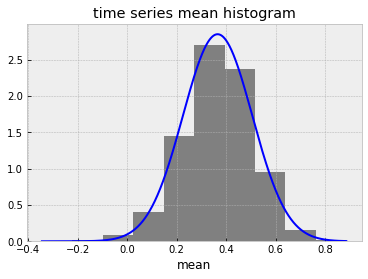

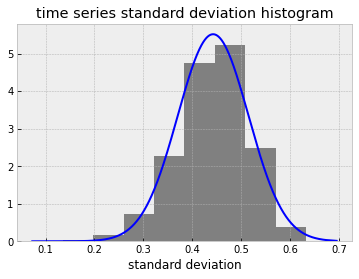

time: 348 ms (started: 2022-04-27 05:03:48 +00:00)


In [10]:
pl.plot(mean,fit1,color='blue')
pl.hist(mean,density=True,color='grey')
pl.title('time series mean histogram')
pl.xlabel('mean')
pl.show()
pl.close()
pl.plot(stdev,fit2,color='blue')
pl.hist(stdev,density=True,color='grey')
pl.title('time series standard deviation histogram')
pl.xlabel('standard deviation')
pl.show()
pl.close()

# ARIMA Modeling

In [11]:
train = pd.read_csv('./stock_correlation_prediction/train_dev_test/before_arima/train.csv')
dev = pd.read_csv('./stock_correlation_prediction/train_dev_test/before_arima/dev.csv')
test1 = pd.read_csv('./stock_correlation_prediction/train_dev_test/before_arima/test1.csv')
test2 = pd.read_csv('./stock_correlation_prediction/train_dev_test/before_arima/test2.csv')

train = np.transpose(train.loc[:,~train.columns.str.contains('^Unnamed')])
dev = np.transpose(dev.loc[:,~dev.columns.str.contains('^Unnamed')])
test1 = np.transpose(test1.loc[:,~test1.columns.str.contains('^Unnamed')])
test2 = np.transpose(test2.loc[:,~test2.columns.str.contains('^Unnamed')])

datasets = [train, dev, test1, test2]

time: 472 ms (started: 2022-04-27 05:03:49 +00:00)


In [12]:
model_110 = ARIMA(order=(1,1,0), mle_regression=True, suppress_warnings=True)
model_011 = ARIMA(order=(0,1,1), mle_regression=True, suppress_warnings=True)
model_111 = ARIMA(order=(1,1,1), mle_regression=True, suppress_warnings=True)
model_211 = ARIMA(order=(2,1,1), mle_regression=True, suppress_warnings=True)
model_210 = ARIMA(order=(2,1,0), mle_regression=True, suppress_warnings=True)

train_X = []; train_Y = []
dev_X = []; dev_Y = []
test1_X = []; test1_Y = []
test2_X = []; test2_Y = []

flag = 0

for i in range(55875):
    print(i)
    tmp = []
    c=0
    for s in datasets :
        c+=1
        try:
            model1 = model_110.fit(s[i])
            model = model1
            
            try:
                model2 = model_011.fit(s[i])
                
                if model.aic() <= model2.aic() :
                    pass
                else :
                    model = model2
                    
                try :
                    model3 = model_111.fit(s[i])
                    if model.aic() <= model3.aic() :
                        pass
                    else :
                        model = model3
                except :
                    try:
                        model4 = model_211.fit(s[i])
                        
                        if model.aic() <= model4.aic() :
                            pass
                        else:
                            model = model4
                    except:
                        try:
                            model5 = model_210.fit(s[i])
                            
                            if model.aic() <= model5.aic():
                                pass
                            else :
                                model = model5
                        except :
                            pass
                    
            except:
                try:
                    model3 = model_111.fit(s[i])

                    if model.aic() <= model3.aic() :
                        pass
                    else :
                        model = model3
                except :
                    try:
                        model4 = model_211.fit(s[i])
                        
                        if model.aic() <= model4.aic() :
                            pass
                        else:
                            model = model4
                    except:
                        try:
                            model5 = model_210.fit(s[i])
                            
                            if model.aic() <= model5.aic():
                                pass
                            else :
                                model = model5
                        except :
                            pass
                
        except:
            try:
                model2 = model_011.fit(s[i])
                model = model2
            
                try :
                    model3 = model_111.fit(s[i])
                    
                    if model.aic() <= model3.aic():
                        pass
                    else:
                        model = model3
                except :
                    try:
                        model4 = model_211.fit(s[i])
                        
                        if model.aic() <= model4.aic() :
                            pass
                        else:
                            model = model4
                    except:
                        try:
                            model5 = model_210.fit(s[i])
                            
                            if model.aic() <= model5.aic():
                                pass
                            else :
                                model = model5
                        except :
                            pass
            
            except :
                try:
                    model3 = model_111.fit(s[i])
                    model = model3
                except :
                    try:
                        model4 = model_211.fit(s[i])
                        
                        if model.aic() <= model4.aic() :
                            pass
                        else:
                            model = model4
                    except:
                        try:
                            model5 = model_210.fit(s[i])
                            
                            if model.aic() <= model5.aic():
                                pass
                            else :
                                model = model5
                        except :
                            flag = 1
                            print(str(c) + " FATAL ERROR")
                            break
        
        predictions = list(model.predict_in_sample())
        #pad the first time step of predictions with the average of the prediction values
        #so as to match the length of the s[i] data
        predictions = [np.mean(predictions[1:])] + predictions[1:]
        
        residual = pd.Series(np.array(s[i]) - np.array(predictions))
        tmp.append(np.array(residual))
        
                    
    if flag == 1:
        break
    train_X.append(tmp[0][:20])
    train_Y.append(tmp[0][20])
    dev_X.append(tmp[1][:20])
    dev_Y.append(tmp[1][20])
    test1_X.append(tmp[2][:20])
    test1_Y.append(tmp[2][20])
    test2_X.append(tmp[3][:20])
    test2_Y.append(tmp[3][20])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [13]:
pd.DataFrame(train_X).to_csv('./stock_correlation_prediction/train_dev_test/after_arima_no_mle_reg/train_X.csv')
pd.DataFrame(dev_X).to_csv('./stock_correlation_prediction/train_dev_test/after_arima_no_mle_reg/dev_X.csv')
pd.DataFrame(test1_X).to_csv('./stock_correlation_prediction/train_dev_test/after_arima_no_mle_reg/test1_X.csv')
pd.DataFrame(test2_X).to_csv('./stock_correlation_prediction/train_dev_test/after_arima_no_mle_reg/test2_X.csv')
pd.DataFrame(train_Y).to_csv('./stock_correlation_prediction/train_dev_test/after_arima_no_mle_reg/train_Y.csv')
pd.DataFrame(dev_Y).to_csv('./stock_correlation_prediction/train_dev_test/after_arima_no_mle_reg/dev_Y.csv')
pd.DataFrame(test1_Y).to_csv('./stock_correlation_prediction/train_dev_test/after_arima_no_mle_reg/test1_Y.csv')
pd.DataFrame(test2_Y).to_csv('./stock_correlation_prediction/train_dev_test/after_arima_no_mle_reg/test2_Y.csv')

time: 4.49 s (started: 2022-04-27 10:26:13 +00:00)


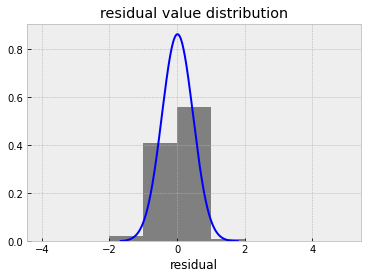

0.0 % of the data is out of bound [-2,2]
3.0733780760626397 % of the data is out of bound [-1,1]
time: 3.75 s (started: 2022-04-27 10:26:18 +00:00)


In [14]:
train = pd.read_csv('./stock_correlation_prediction/train_dev_test/after_arima_no_mle_reg/train_X.csv')
train = np.transpose(train.loc[:,~train.columns.str.contains('^Unnamed')])
train_melt = sorted(np.array(train.melt()['value']))
fit = stats.norm.pdf(train_melt, np.mean(train_melt), np.std(train_melt))
pl.hist(train_melt,density=True, color='grey', bins=[-4,-3,-2,-1,0,1,2,3,4,5])
pl.plot(train_melt,fit,color='blue')
pl.title('residual value distribution')
pl.xlabel('residual')
pl.show()
pl.close()

X = [x for x in train_melt if x>2]
Y = [y for y in train_melt if y<-2]
out_of_bound = X + Y
print(str(len(out_of_bound)/11175) +' % of the data is out of bound [-2,2]')

X = [x for x in train_melt if x>1]
Y = [y for y in train_melt if y<-1]
out_of_bound = X + Y
print(str(len(out_of_bound)/11175) +' % of the data is out of bound [-1,1]')

# function & check test

In [15]:
np.random.randint(0,55875, size=10)

array([32210,  2666, 43427, 30182,  5110, 13775, 20107, 20863, 26549,
       37162])

time: 1.27 ms (started: 2022-04-27 10:26:22 +00:00)


5384


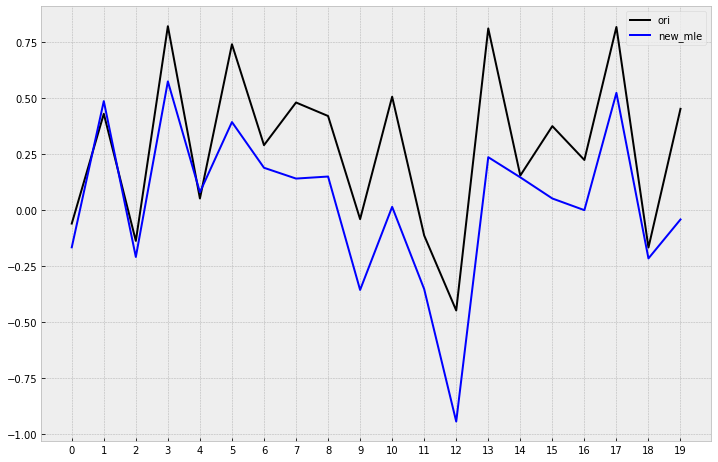

29705


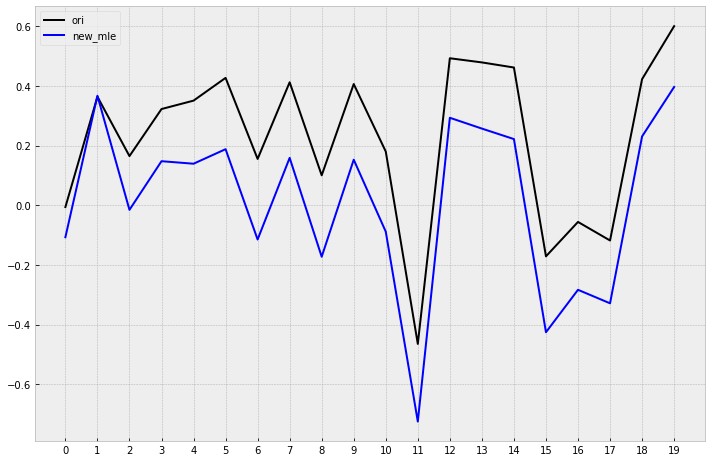

21814


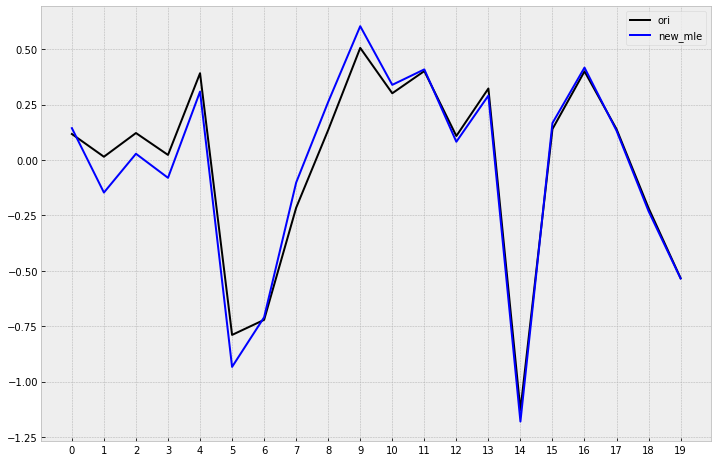

28964


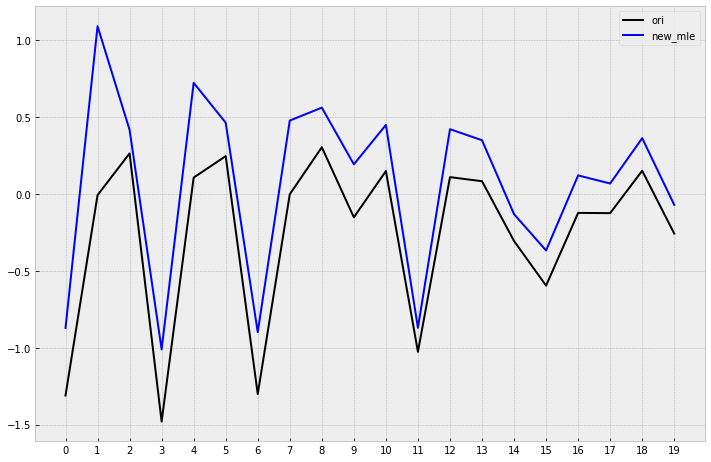

24326


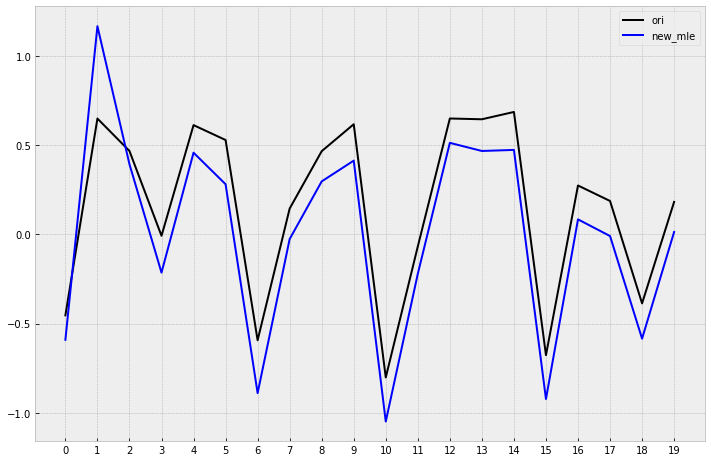

38783


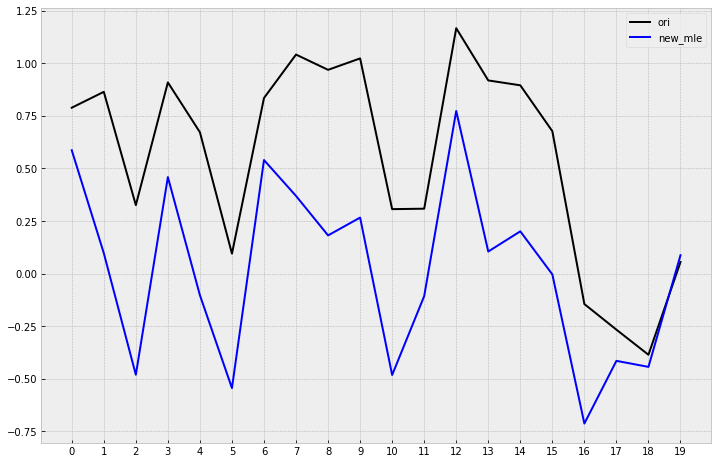

24493


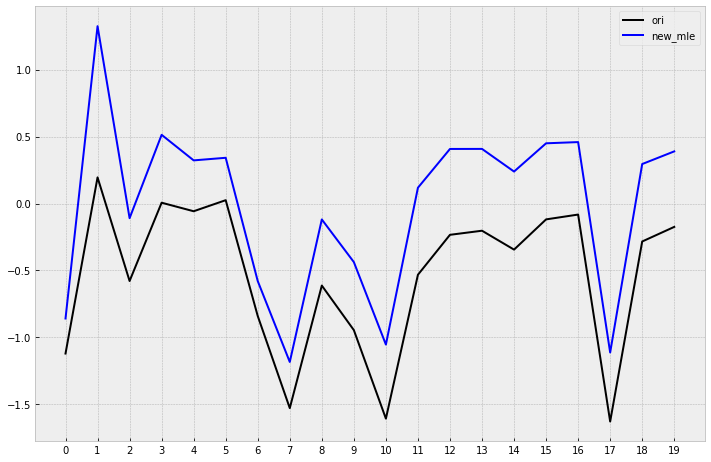

18182


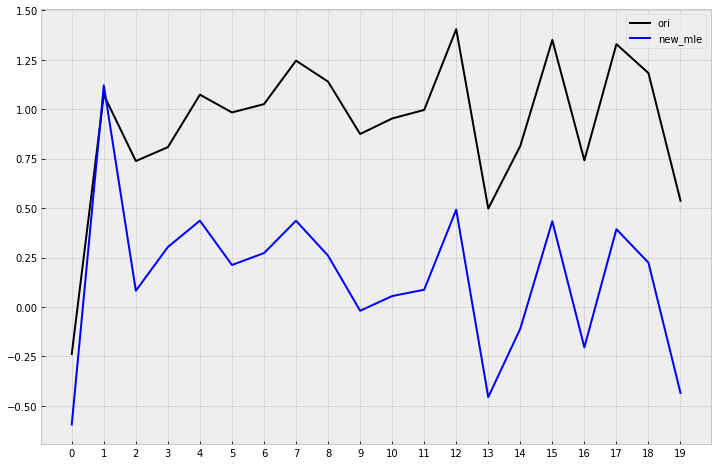

32349


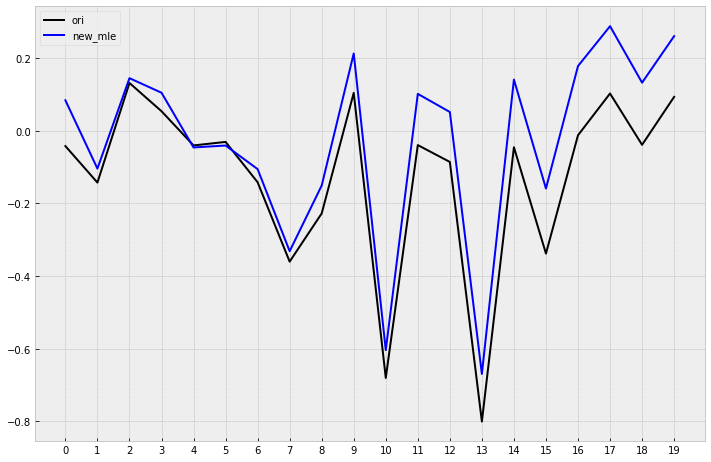

19792


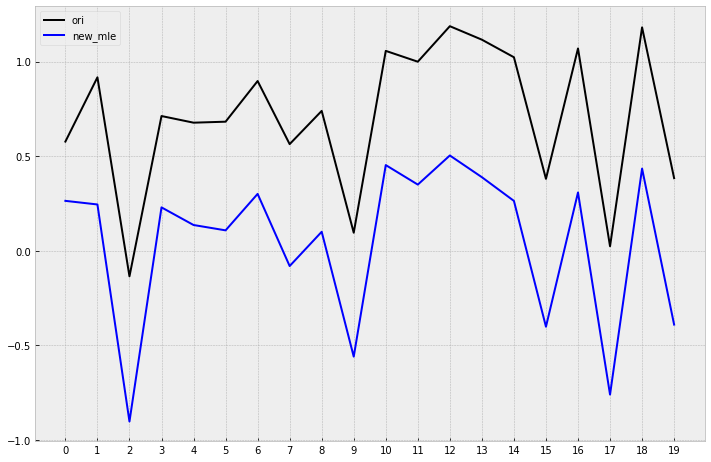

time: 1.27 s (started: 2022-04-27 18:20:39 +00:00)


In [18]:
ori_train_X = pd.read_csv('./train_dev_test/after_arima/train_X.csv', index_col=0)
new_mle_train_X = pd.read_csv('./stock_correlation_prediction/train_dev_test/after_arima_no_mle_reg/train_X.csv', index_col=0)
for i in np.random.randint(10, 55875, size=10):
    print(i)
    plt.figure(figsize=(12,8))
    plt.plot(ori_train_X.iloc[i, :], label="ori", color="black")
    plt.plot(new_mle_train_X.iloc[i, :], label="new_mle", color="blue")
    plt.legend()
    plt.show()
    plt.close()

[0.4395224117339641, 0.8843658836826154, 0.5521160889534354, 0.6276048249856819, 0.4364841957674348, 0.2523541319621421, 0.3115426705135287, 0.3932116029131386, 0.21904441672374367, 0.46259023862503196, 0.5632362800611654, 0.663301960620925, 0.4998722904493704, 0.44851335625843686, 0.5094981562509118, 0.33872068880342016, 0.3844093429725957, 0.5048177477271519, 0.3561283400826054, 0.5146232074446967, -0.1319871901187495]
[0.47608224 0.24936094 0.3506108  0.26028007 0.28185895 0.23806711
 0.23246082 0.20454889 0.18966654 0.16717311] (10,)
0     0.699027
1     0.766310
2    -0.055491
3     0.866159
4     0.521838
5     0.755330
6     0.936298
7     0.845398
8     0.065505
9     0.857082
10    0.877976
11    0.938353
12    0.720781
13    0.865657
14    0.860587
15    0.834049
16    0.858244
17    0.873805
18   -0.571878
19    0.767781
20    0.141342
Name: 10735, dtype: float64
0.4395224117339641


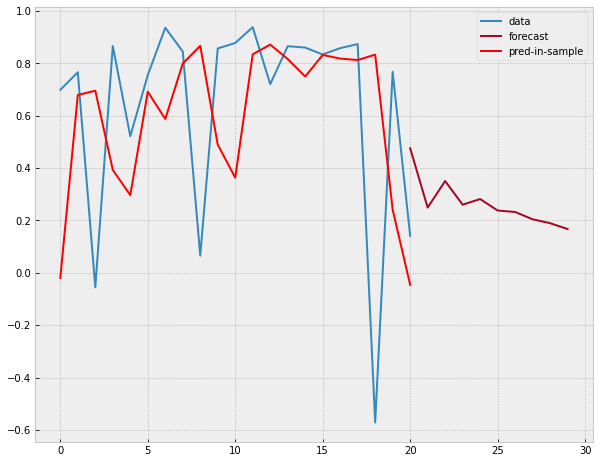

time: 112 ms (started: 2022-04-28 12:42:44 +00:00)


In [27]:

model_110 = ARIMA(order=(1,1,0), out_of_sample_size=0, mle_regression=True, suppress_warnings=True)
# model_011 = ARIMA(order=(0,1,1), out_of_sample_size=0, mle_regression=True, suppress_warnings=True)
# model_111 = ARIMA(order=(1,1,1), out_of_sample_size=0, mle_regression=True, suppress_warnings=True)
# model_211 = ARIMA(order=(2,1,1), out_of_sample_size=0, mle_regression=True, suppress_warnings=True)
# model_210 = ARIMA(order=(2,1,0), out_of_sample_size=0, mle_regression=True, suppress_warnings=True)

i=10735
s= datasets[0]

model1 = model_110.fit(s[i])
model = model1
pred_in_sample = list(model.predict_in_sample())
# predictions = [np.mean(predictions[1:])] + predictions[1:]
forecasts = model.predict()
temp_x = np.arange(len(s[i])+10)


print(predictions)
print(forecasts, forecasts.shape)
print(s[i])
print(np.mean(predictions[1:])) 

plt.figure(figsize=(10,8))
plt.plot(temp_x[:len(s[i])], s[i], label="data")
plt.plot(temp_x[len(s[i]):]-1, forecasts, label="forecast")
plt.plot(pred_in_sample, c ="red", label="pred-in-sample")
plt.legend()

plt.show()
plt.close()

# predictions = list(model.predict_in_sample())
# #pad the first time step of predictions with the average of the prediction values
# #so as to match the length of the s[i] data
# predictions = [np.mean(predictions)] + predictions

# residual = pd.Series(np.array(s[i]) - np.array(predictions))

In [24]:
datasets[0][1].shape

(21,)

time: 1.41 ms (started: 2022-04-28 11:52:29 +00:00)
